In [1]:
import xarray as xr
import os, glob, sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

root_dir = '/media/harish/SSD_4TB/EU_SCORES_project'
scripts_dir = f'{root_dir}/scripts'
sys.path.append(scripts_dir)

from analysis.plotters import map_plotter, all_sample_points, variability_plotter, months, power_profile_plotter, all_sample_points, colors, calculate_color_levels
from data_processing.libraries import longitude_convert_0_to_360, find_nearest_indice

fig_dir = f'{root_dir}/Reports/D6.5'

In [2]:
cases = ['Portugal_coast','Ireland_coast','Netherlands_coast']
fig_widths = {'Portugal_coast': 6,
              'Ireland_coast': 6,
              'Netherlands_coast': 6}
fig_heights = {'Portugal_coast': 5,
              'Ireland_coast': 4,
              'Netherlands_coast': 4}
cmap = 'tab20b'

# Wind power

## Wind energy converters

### LEANWIND 8MW

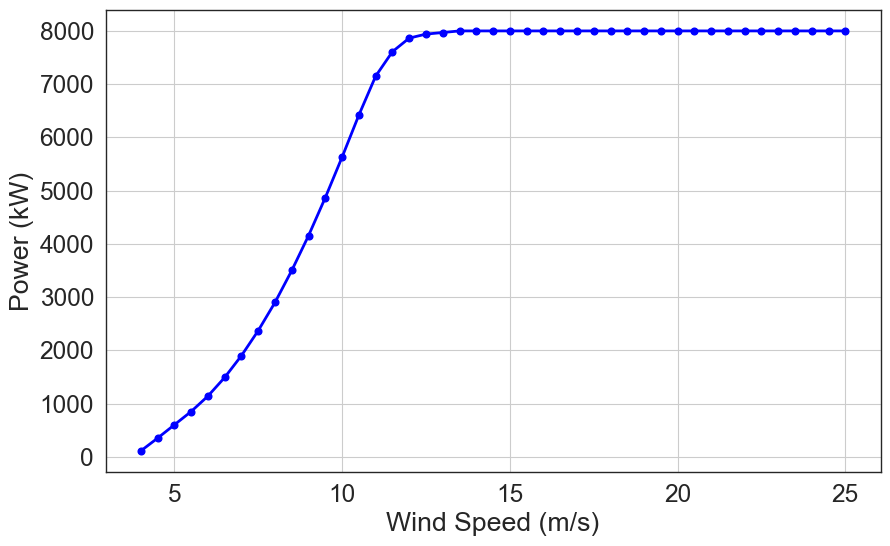

In [7]:
power_curve = pd.read_csv(f'{root_dir}/LEANWIND_8MW_164_RWT.csv', usecols=range(0, 2))
# Create a scatter plot of the power curve
sns.set_theme(style="white")
sns.set_context("paper",font_scale=2)
plt.figure(figsize=(10, 6))
plt.plot(power_curve.iloc[:,0], power_curve.iloc[:,1], color='blue', marker='o',linestyle='-',linewidth=2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
#plt.title('15MW Turbine Power Curve')
plt.grid(True)
#plt.legend()
plt.savefig(f'{fig_dir}/8MW_turbine_power_curve.png',dpi=300,bbox_inches='tight',pad_inches=0)

### IEA 15 MW

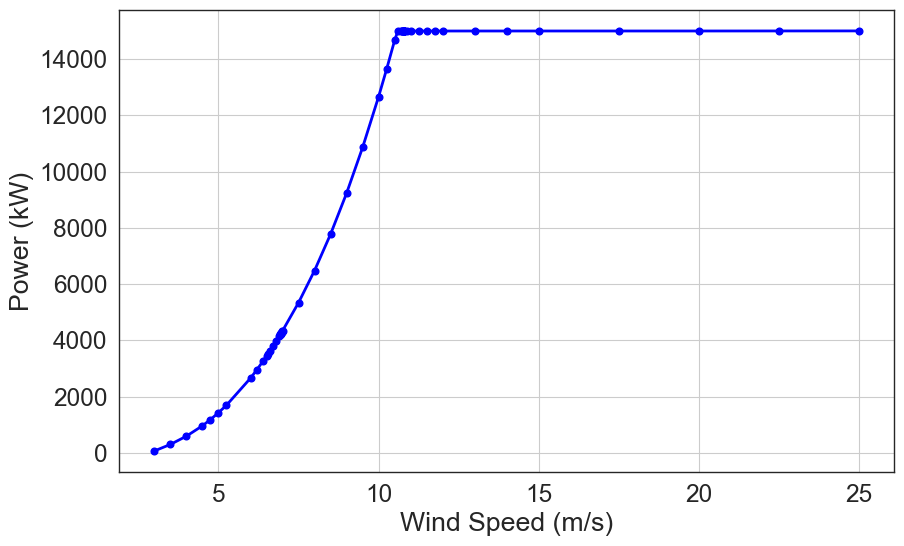

In [8]:
power_curve = pd.read_csv(f'{root_dir}/IEA_15MW_240_RWT.csv', usecols=range(0, 2))
# Create a scatter plot of the power curve
sns.set_theme(style="white")
sns.set_context("paper",font_scale=2)
plt.figure(figsize=(10, 6))
plt.plot(power_curve.iloc[:,0], power_curve.iloc[:,1], color='blue', marker='o',linestyle='-',linewidth=2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (kW)')
#plt.title('15MW Turbine Power Curve')
plt.grid(True)
#plt.legend()
plt.savefig(f'{fig_dir}/15MW_turbine_power_curve.png',dpi=300,bbox_inches='tight',pad_inches=0)

## Power production

In [3]:
start='2020-02-01 00:00:00'
end='2020-02-08 00:00:00'

Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (

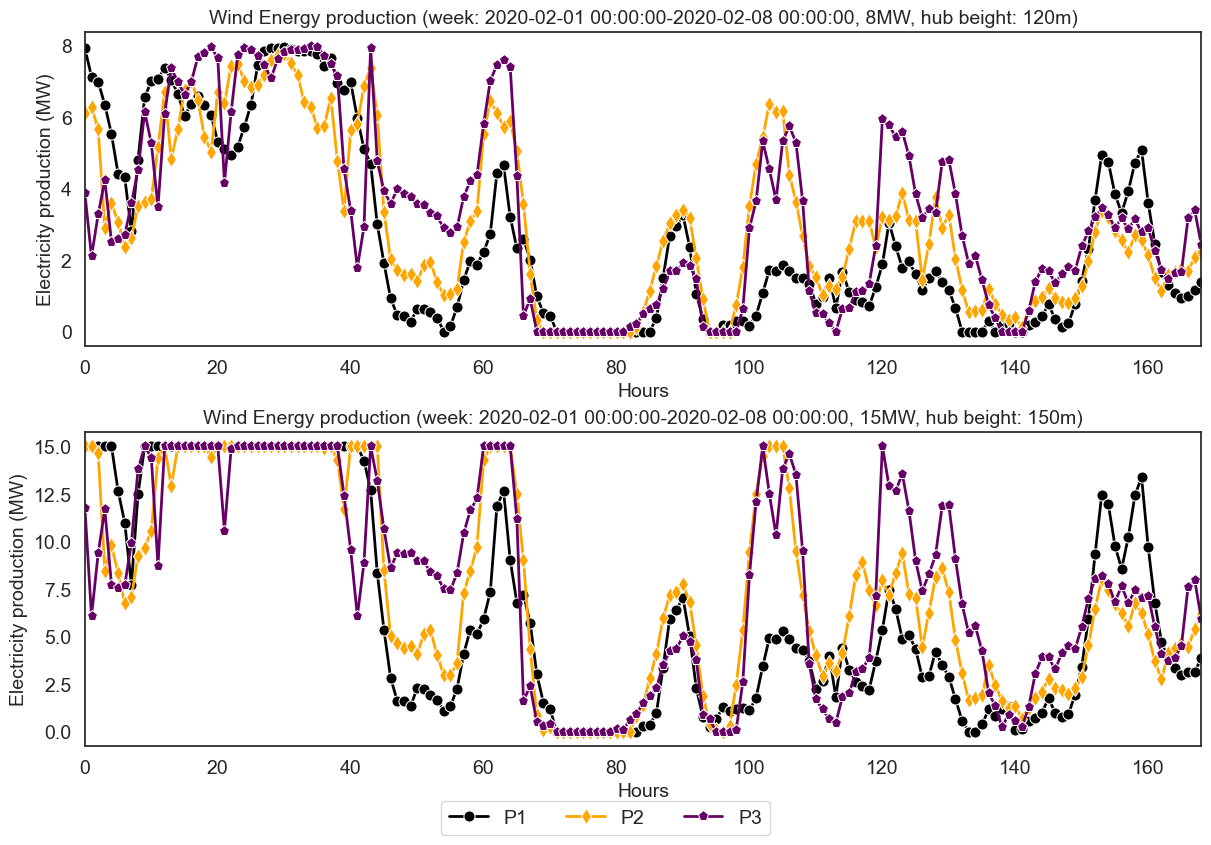

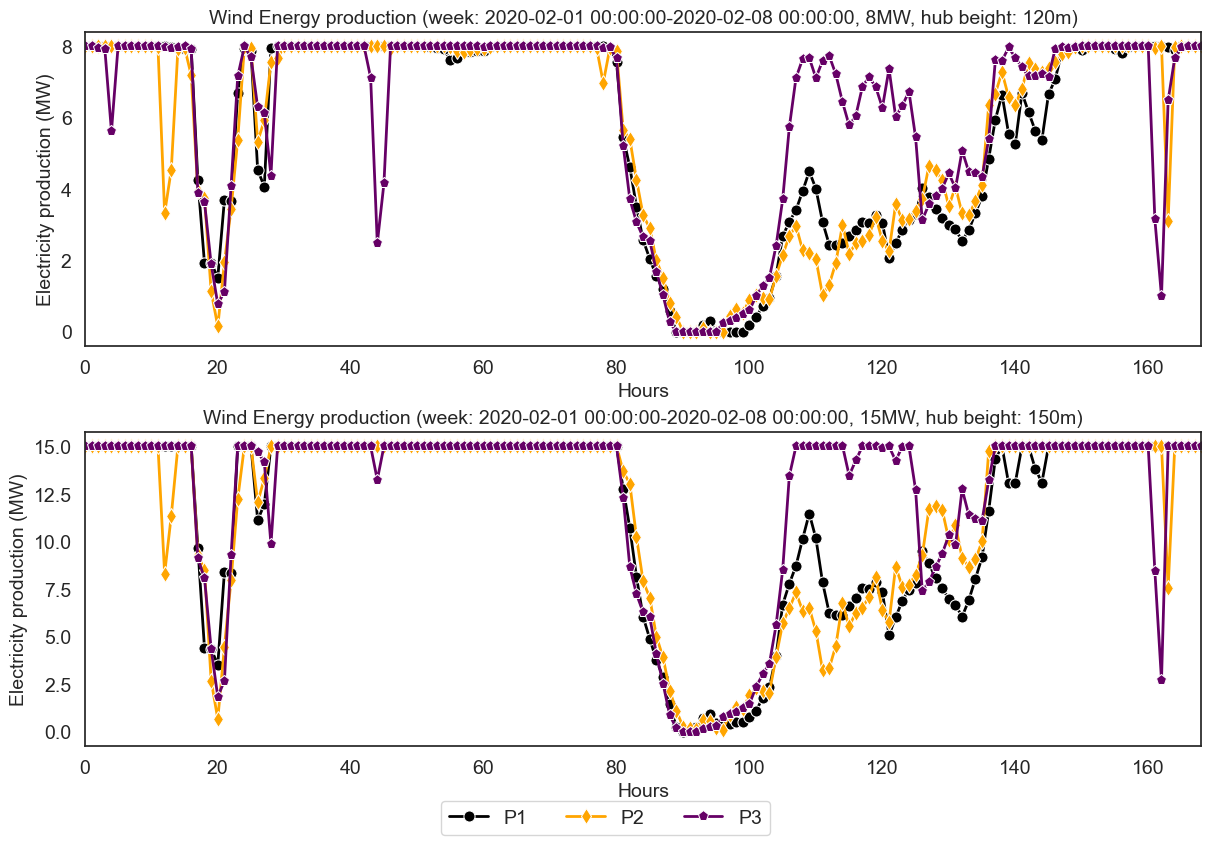

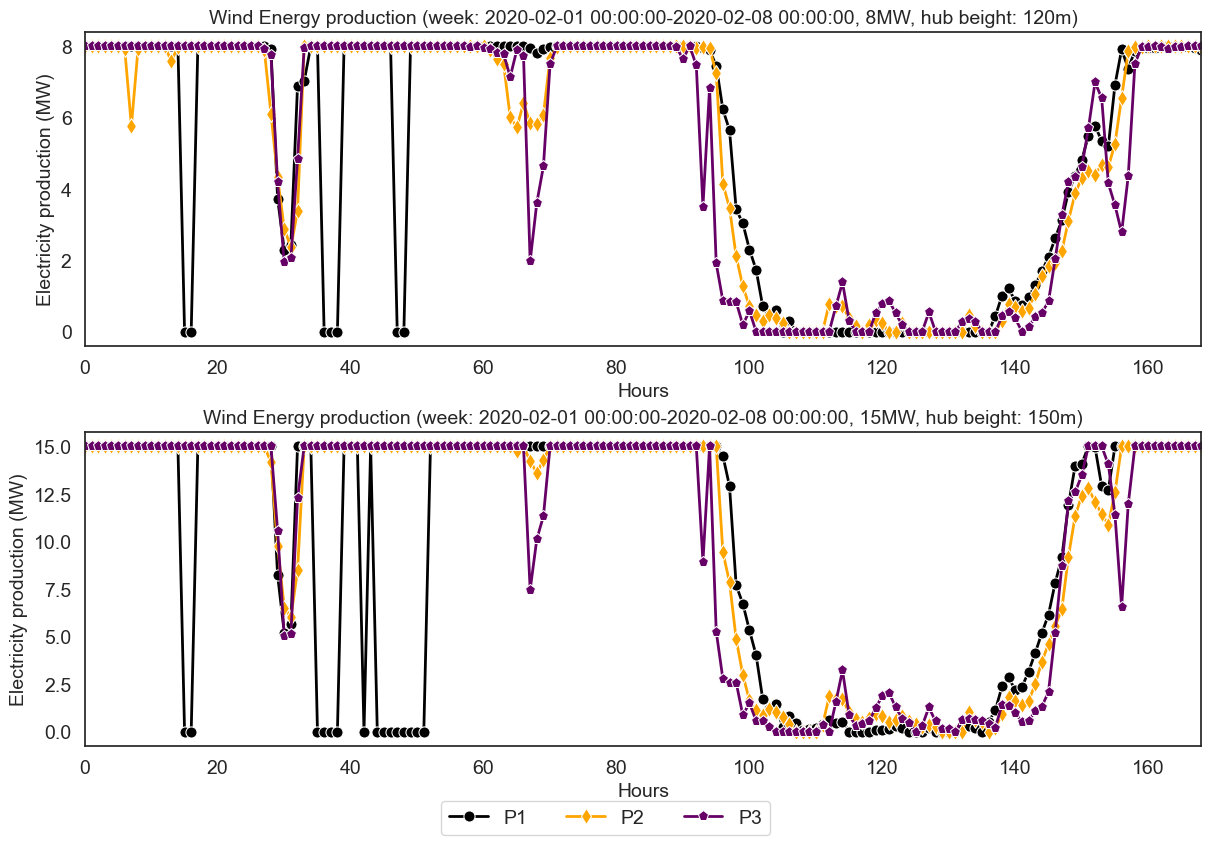

In [15]:
%%time
for case in ['Portugal_coast','Ireland_coast','Netherlands_coast']:
    run='New_runs'
    run_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/variablewise_files'
    chunks={"Time": -1,"south_north": 8,"west_east": 8}
    sample_points = all_sample_points[case]

    fig = plt.figure(figsize=(12, 8), constrained_layout=True)
    gs = fig.add_gridspec(2,1)
    sns.set_theme(style="white")

    for j,(turbine_type,level) in enumerate([('8MW',120),('15MW',150)]):
        tp = xr.open_dataset(f'{run_dir}/{turbine_type}/tp_{level}.nc',chunks=chunks)['power'].sel(Time=slice(start,end))

        hourly_df = pd.DataFrame()
        for i,key in enumerate(sample_points.keys()):
            indices = find_nearest_indice(tp.XLAT,tp.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])
            ds = tp.isel(south_north=indices[0],west_east=indices[1]).values/1e3

            pointwise_df = pd.DataFrame({key: ds},index=pd.Index(np.arange(len(ds)), name='Hour'))
            hourly_df = pd.concat([hourly_df, pointwise_df],axis=1)

        axs = power_profile_plotter(fig,gs[j,0],hourly_df,
                                f'Wind Energy production (week: {start}-{end}, {turbine_type}, hub beight: {level}m)','Hours','Electricity production (MW)', 
                                key,colors[i],'o')

    # Extract legend from one of the subplots
    handles, labels = axs.get_legend_handles_labels()
    # Create a common legend below the figures
    fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05),fontsize=14)

    plt.savefig(f'{fig_dir}/{case}_wind_energy_production.png',dpi=300,bbox_inches='tight',pad_inches=0)

## Wind energy resource assessment
- The turbine power is in kW
- To convert that into capacty factor in percentage, just divide by turbine capacty (in MW) and by 10

### Mean resorce assesment

Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (

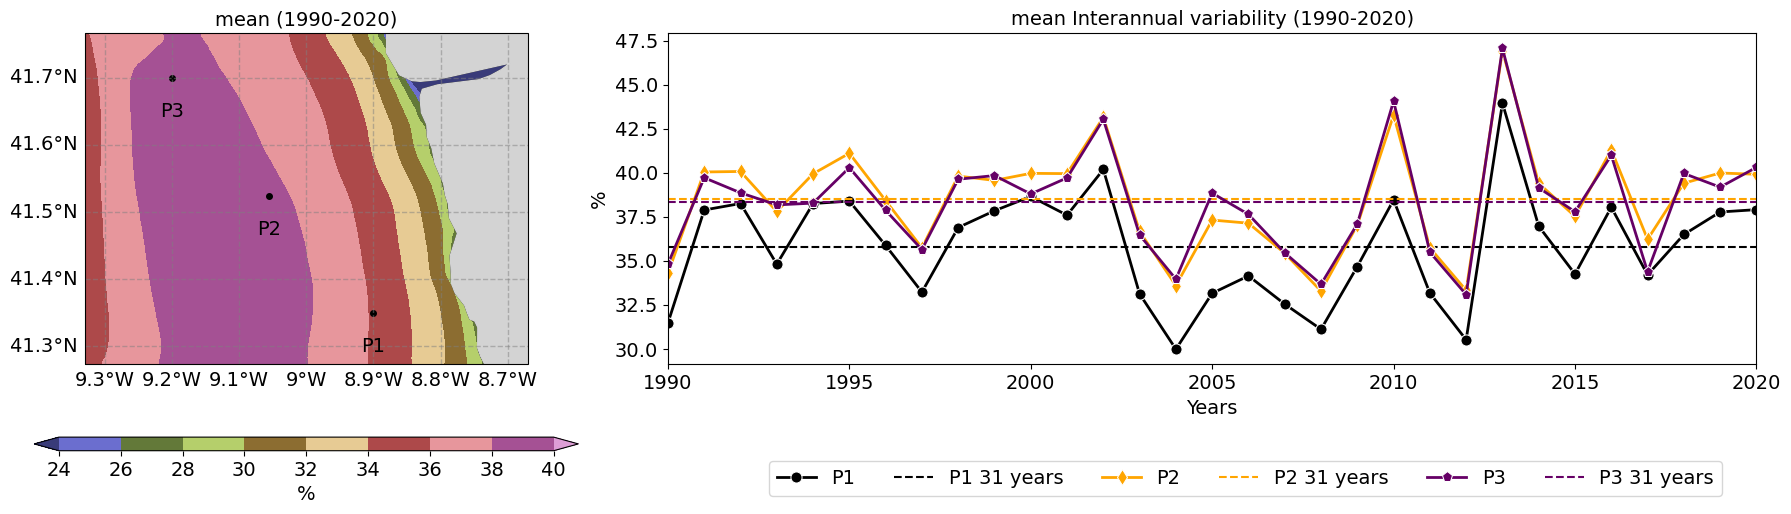

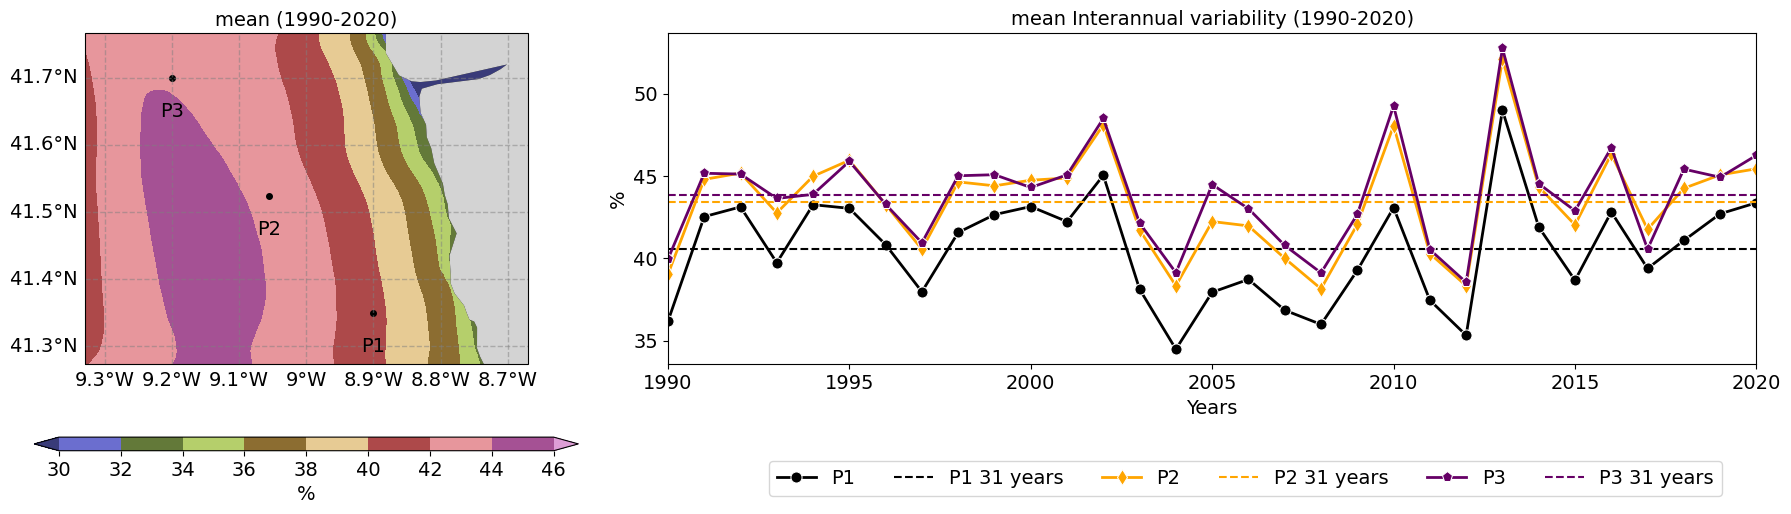

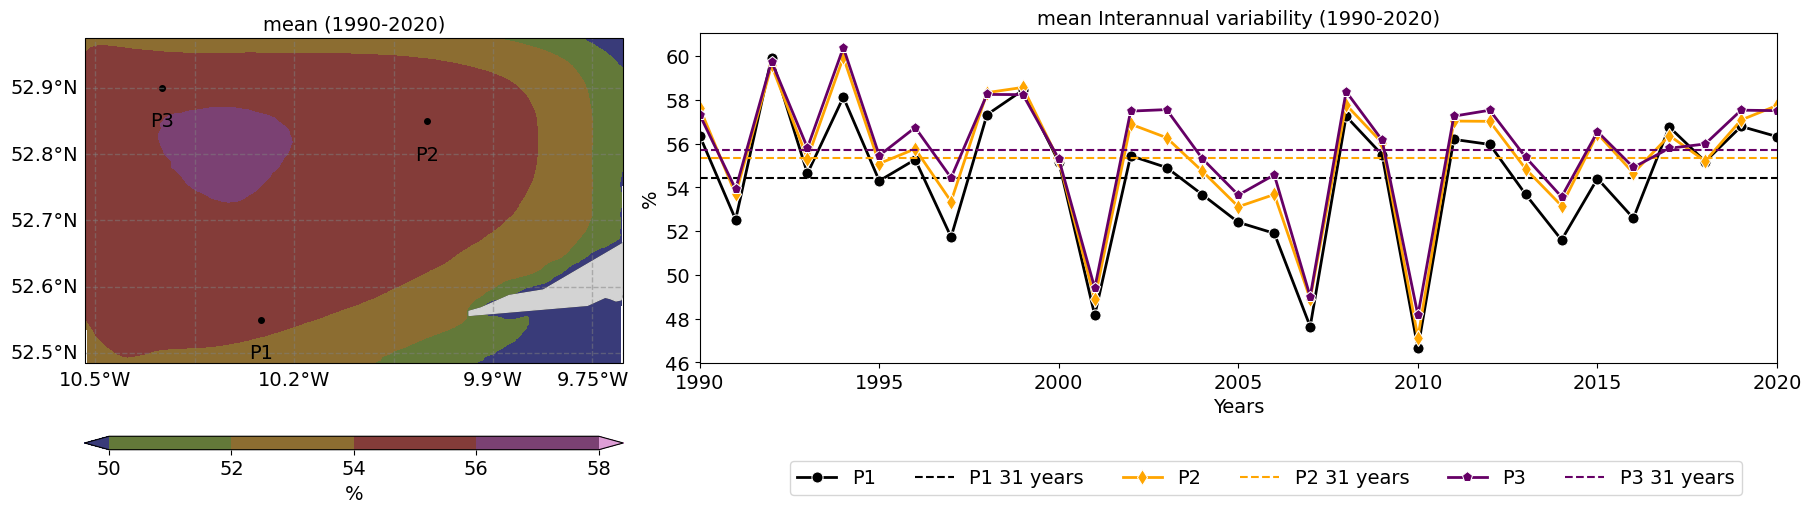

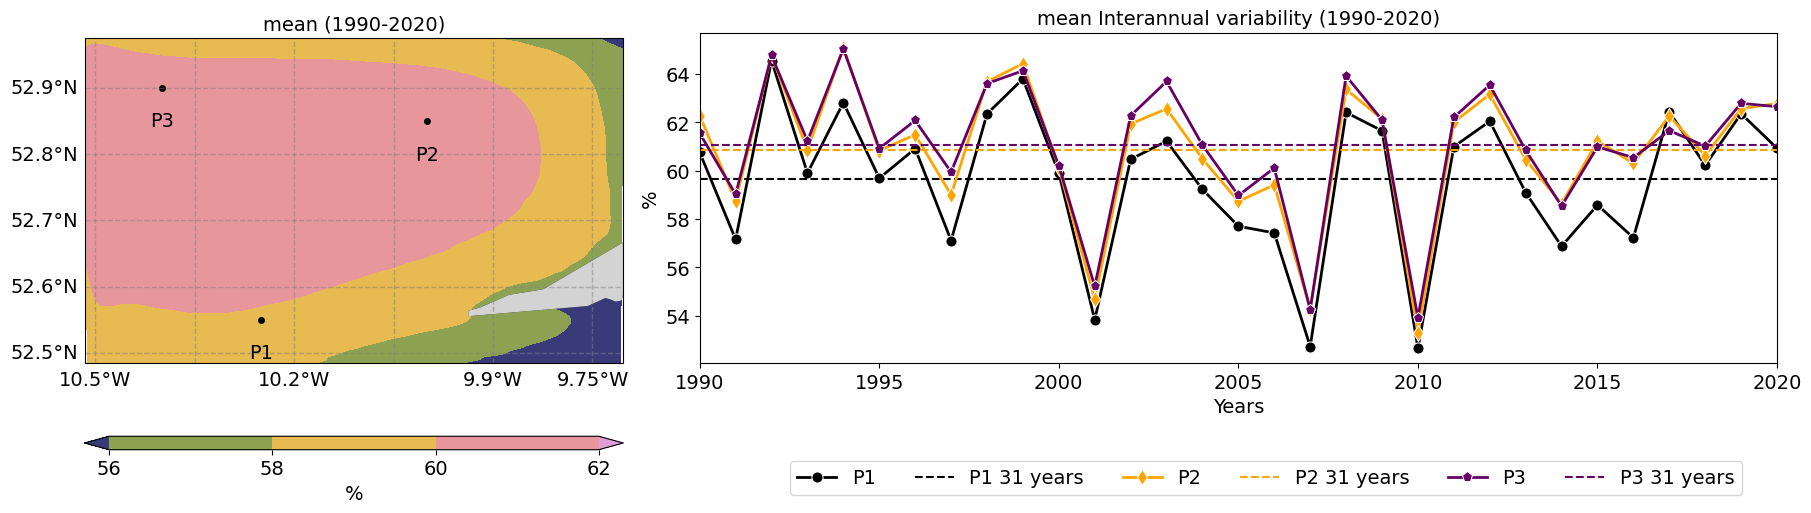

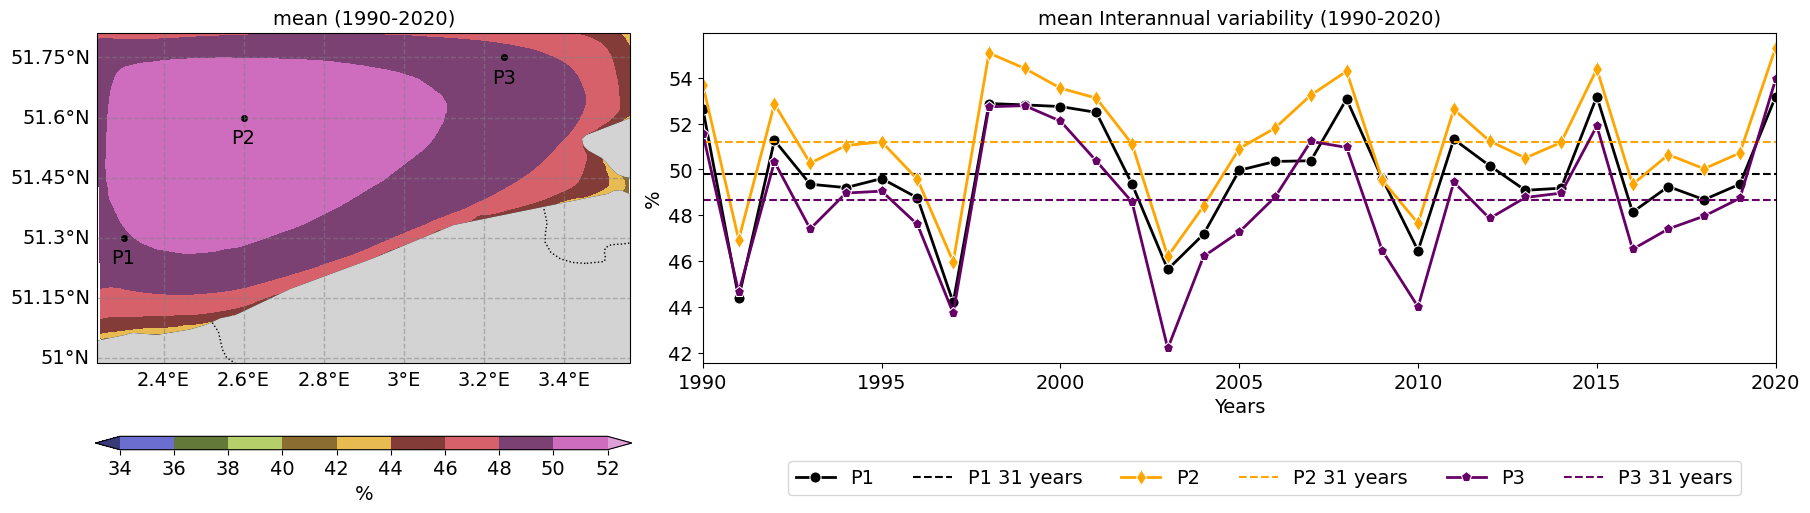

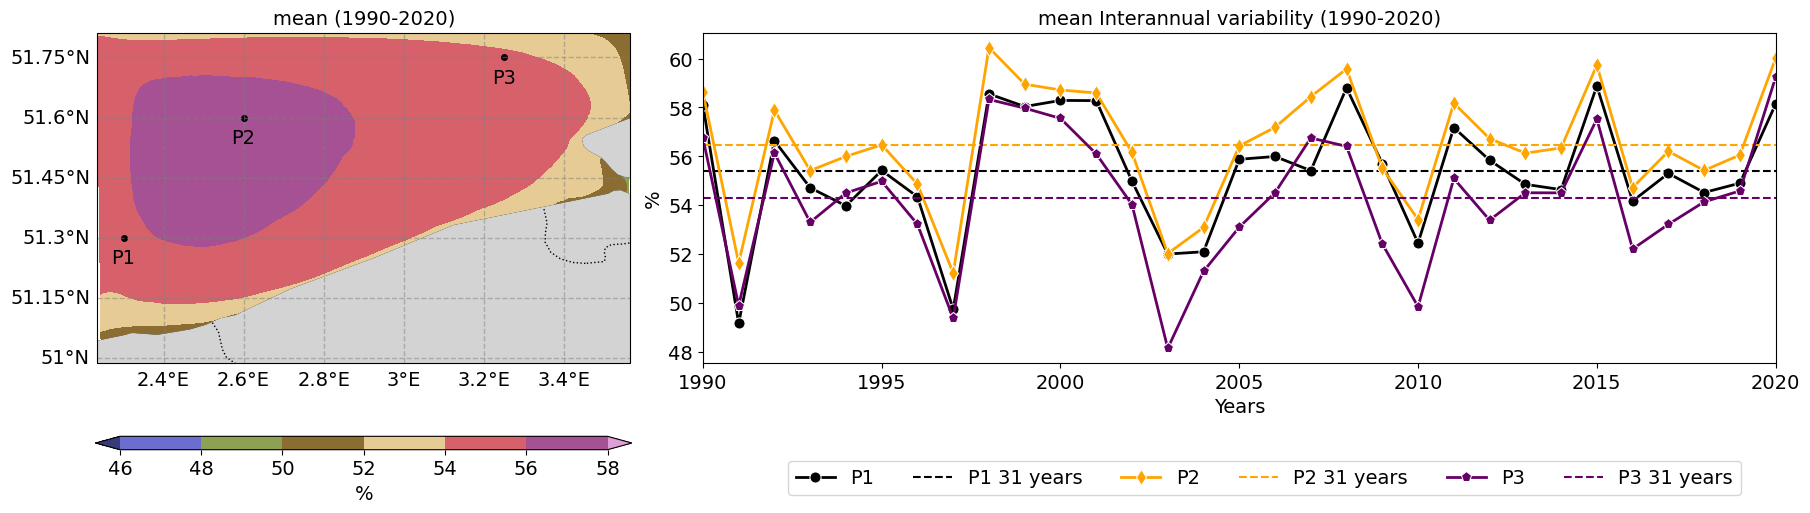

In [13]:
run='New_runs'
for case in cases:
    for j,(turbine_type,level) in enumerate([(8,120),(15,150)]):
        var = f'{turbine_type}MW_{level}m'
        target_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/statistics_files/{turbine_type}MW/tp_{level}'
        parameter = 'mean'
        ds = xr.open_dataset(f'{target_dir}/{parameter}.nc')
        # computing capacity factor and converting to percentage
        ds = ds*0.1/turbine_type

        fig = plt.figure(figsize=(18, 5), constrained_layout=True)
        gs = fig.add_gridspec(1,3)

        clevel = calculate_color_levels(ds.overall_values[20:-20,10:-40])
        cbar_args= {'shrink':1,'cbar_label':'%','orientation':'horizontal'}
        map_plotter(fig,gs[0,0],ds.overall_values[10:-10,10:-10],'XLONG','XLAT',
                    clevel,cmap,f'{parameter} (1990-2020)',cbar_args,
                    sample_points = all_sample_points[case])

        overall_df = pd.DataFrame()
        yearly_df = pd.DataFrame()
        for i,key in enumerate(all_sample_points[case].keys()):
            indices = find_nearest_indice(ds.XLAT,ds.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])

            data = ds.overall_values.sel(south_north=indices[0],west_east=indices[1]).values
            pointwise_df = pd.DataFrame({key: data}, index=pd.Index([0],name='Overall'))
            overall_df = pd.concat([overall_df, pointwise_df],axis=1)

            data = ds.yearly_values.sel(south_north=indices[0],west_east=indices[1]).values
            pointwise_df = pd.DataFrame({key: data}, index=pd.Index(ds.year, name='year'))
            yearly_df = pd.concat([yearly_df, pointwise_df],axis=1)
        xlabel = 'Years'
        ylabel = '%'
        axs = variability_plotter(fig,gs[0,1:3],yearly_df,None,f'{parameter} Interannual variability (1990-2020)',
                            'Years',ylabel,None,None,None)

        # Extract legend from one of the subplots
        handles, labels = axs.get_legend_handles_labels()
        # Create a common legend below the figures
        fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.7, -0.00),fontsize=14)

        plt.savefig(f'{fig_dir}/{case}_overall_{parameter}_and_interannual_{parameter}_{var}.png',dpi=300,bbox_inches='tight',pad_inches=0)

### Monthly statistics

In [4]:
months_indices = [12,1,2,3,4,5,6,7,8,9,10,11]
months_in_seasonal_order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
cases = ['Portugal_coast','Ireland_coast','Netherlands_coast']
clevels = {'Portugal_coast':np.arange(35,65.1,1),
                 'Ireland_coast':np.arange(35,65.1,1),
                 'Netherlands_coast':np.arange(35,65.1,1)}
cmaps = 'tab20b'

Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (

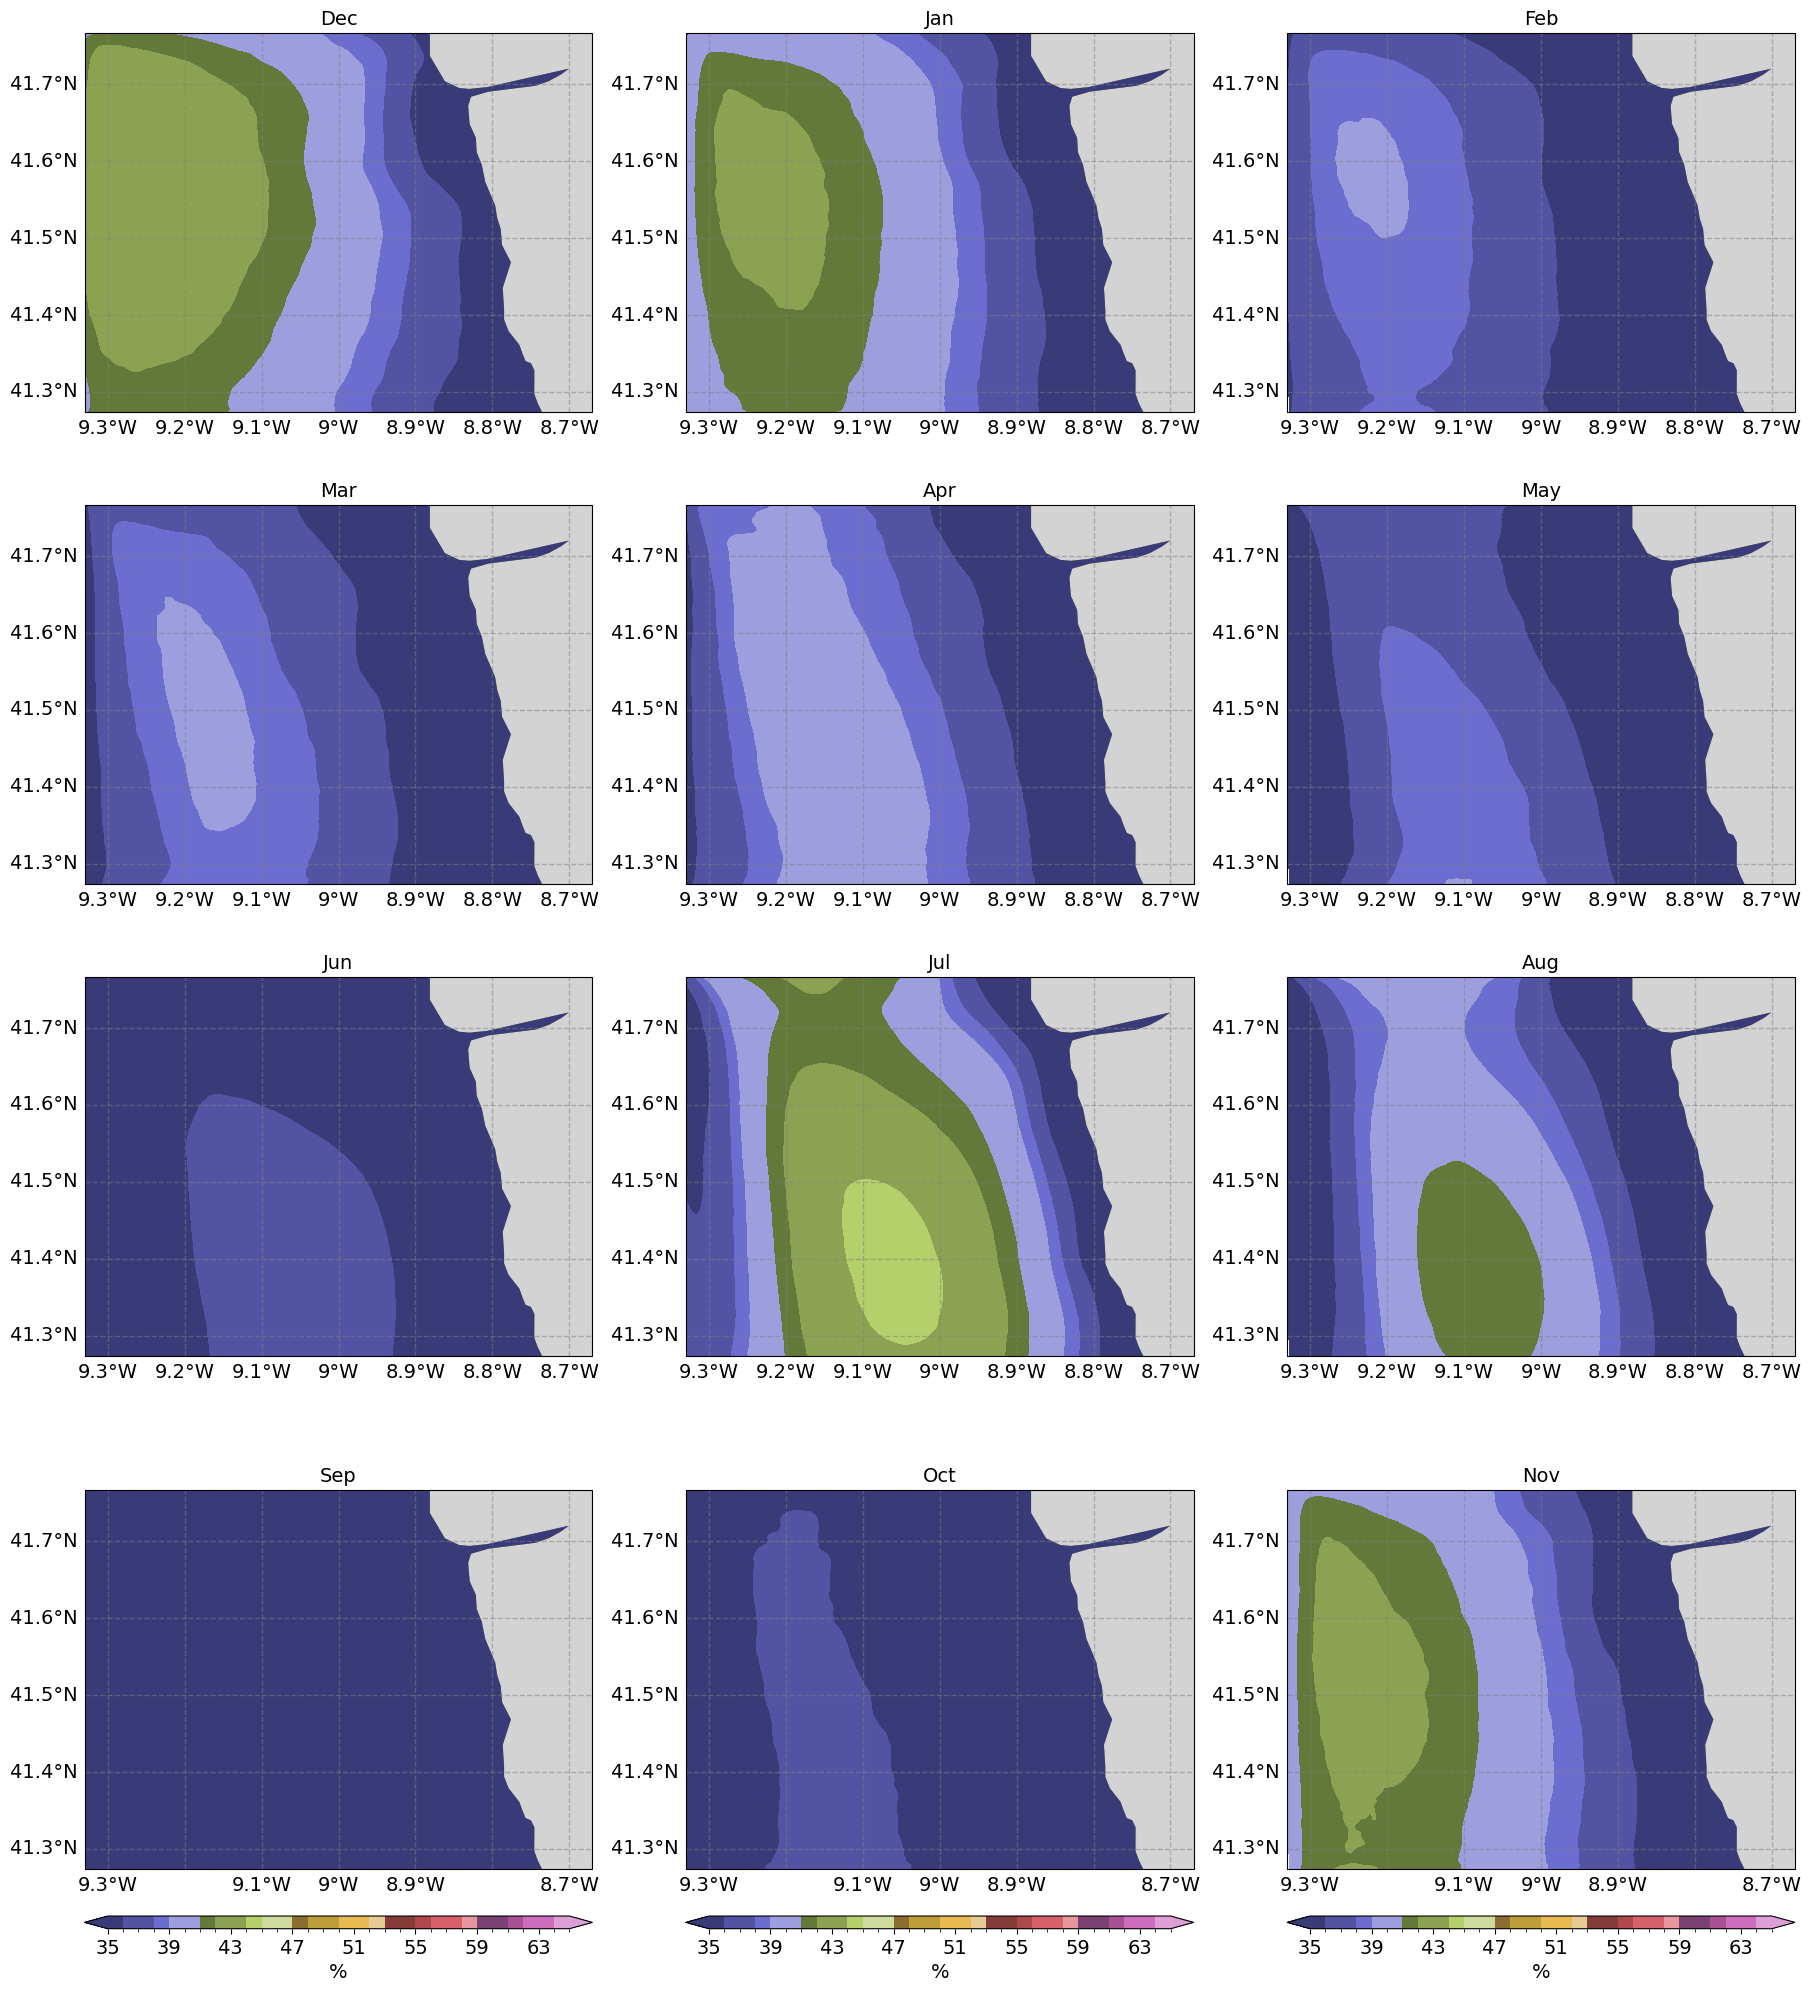

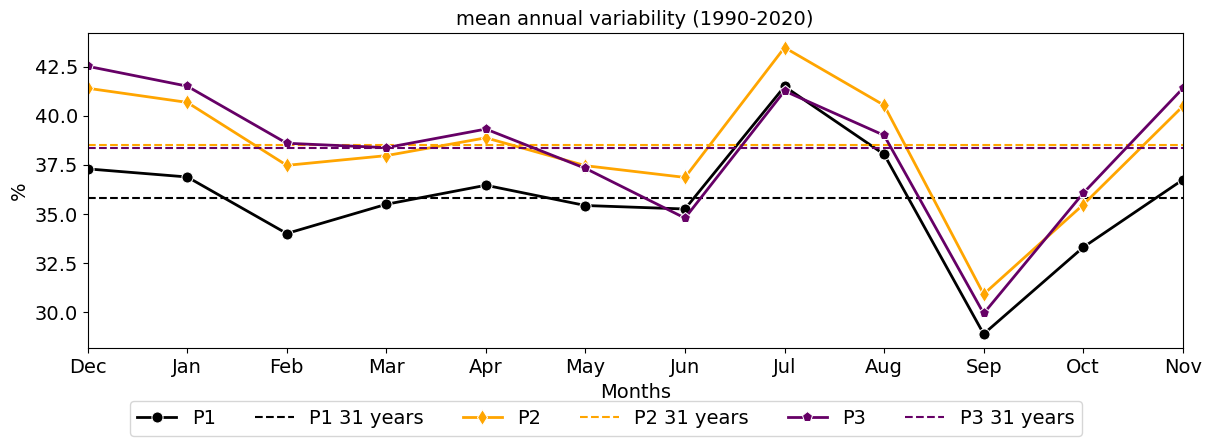

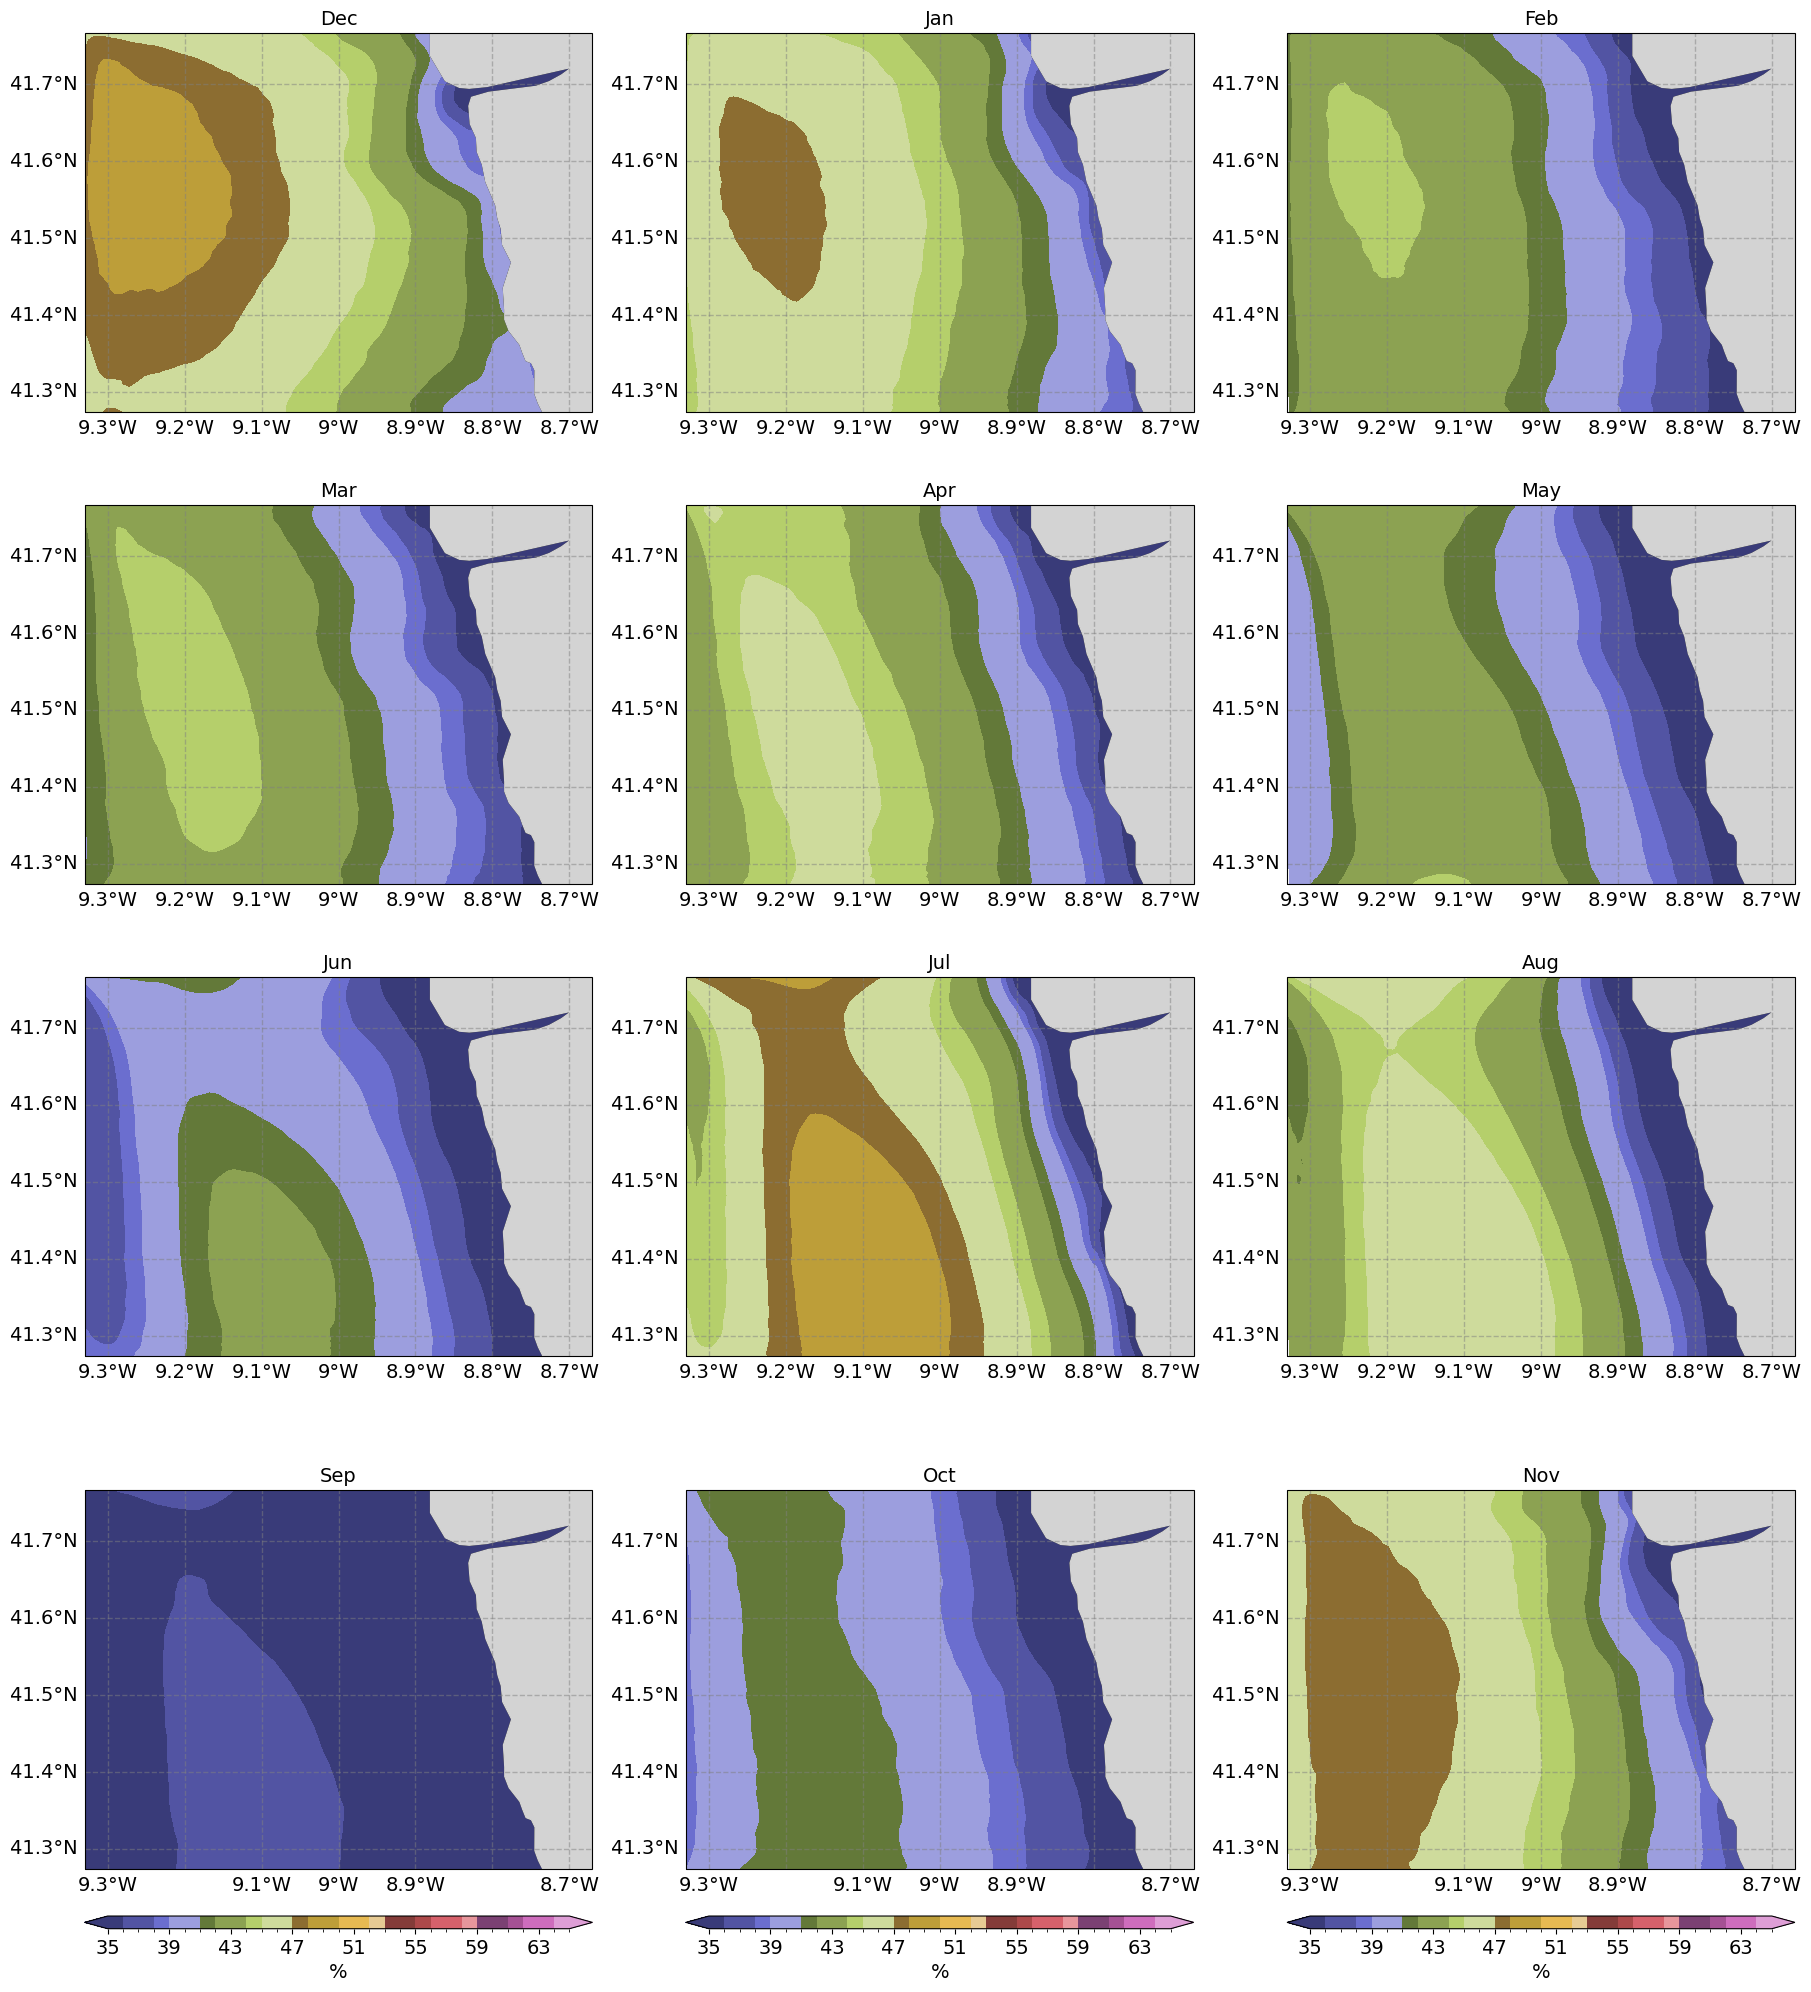

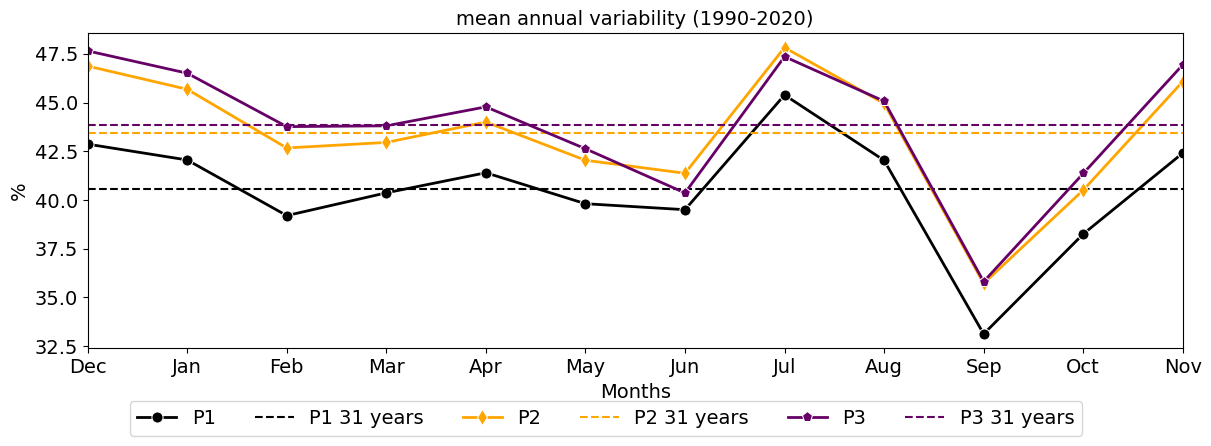

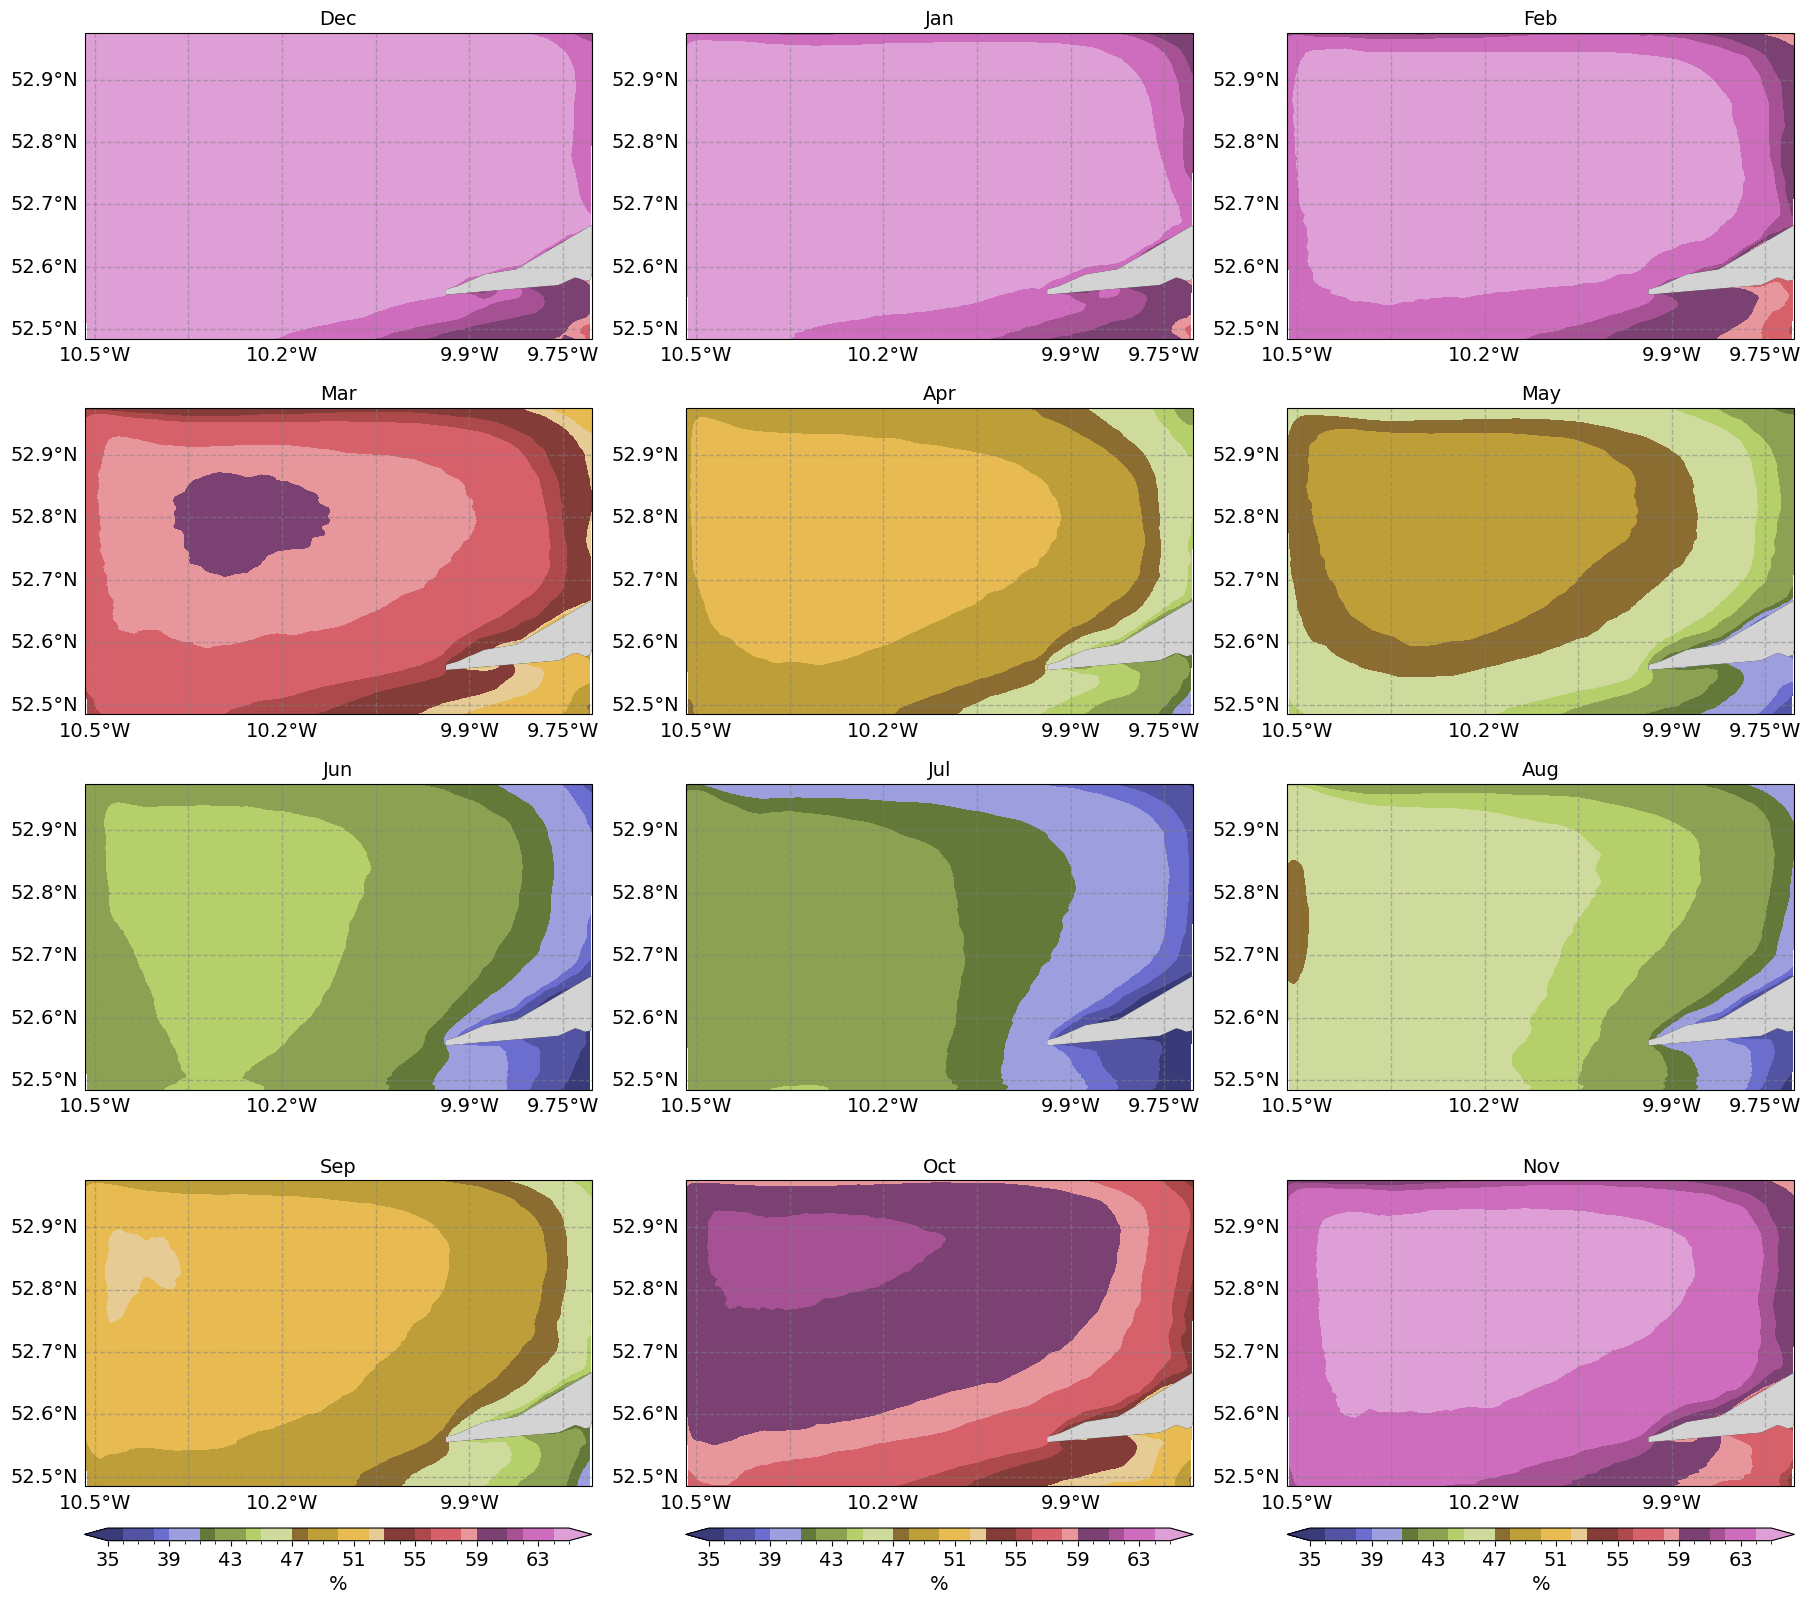

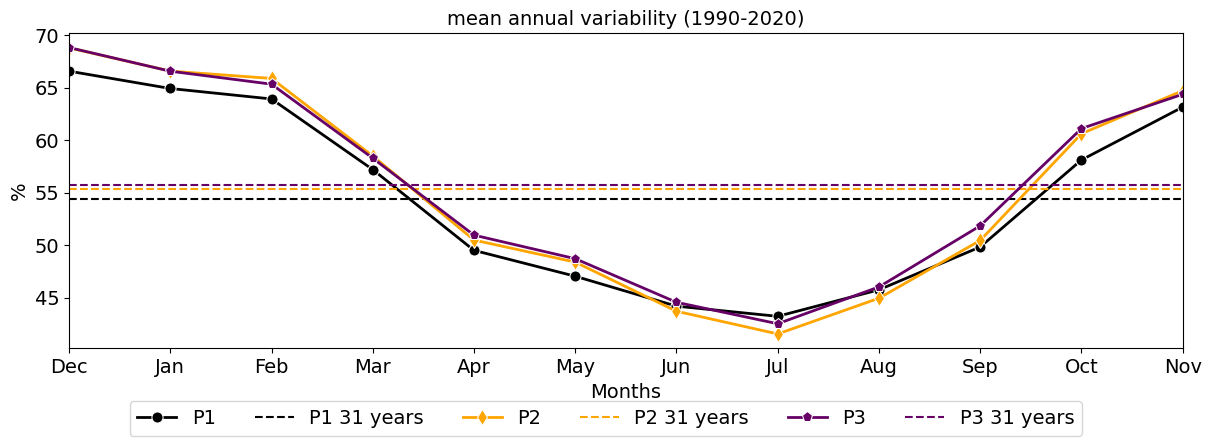

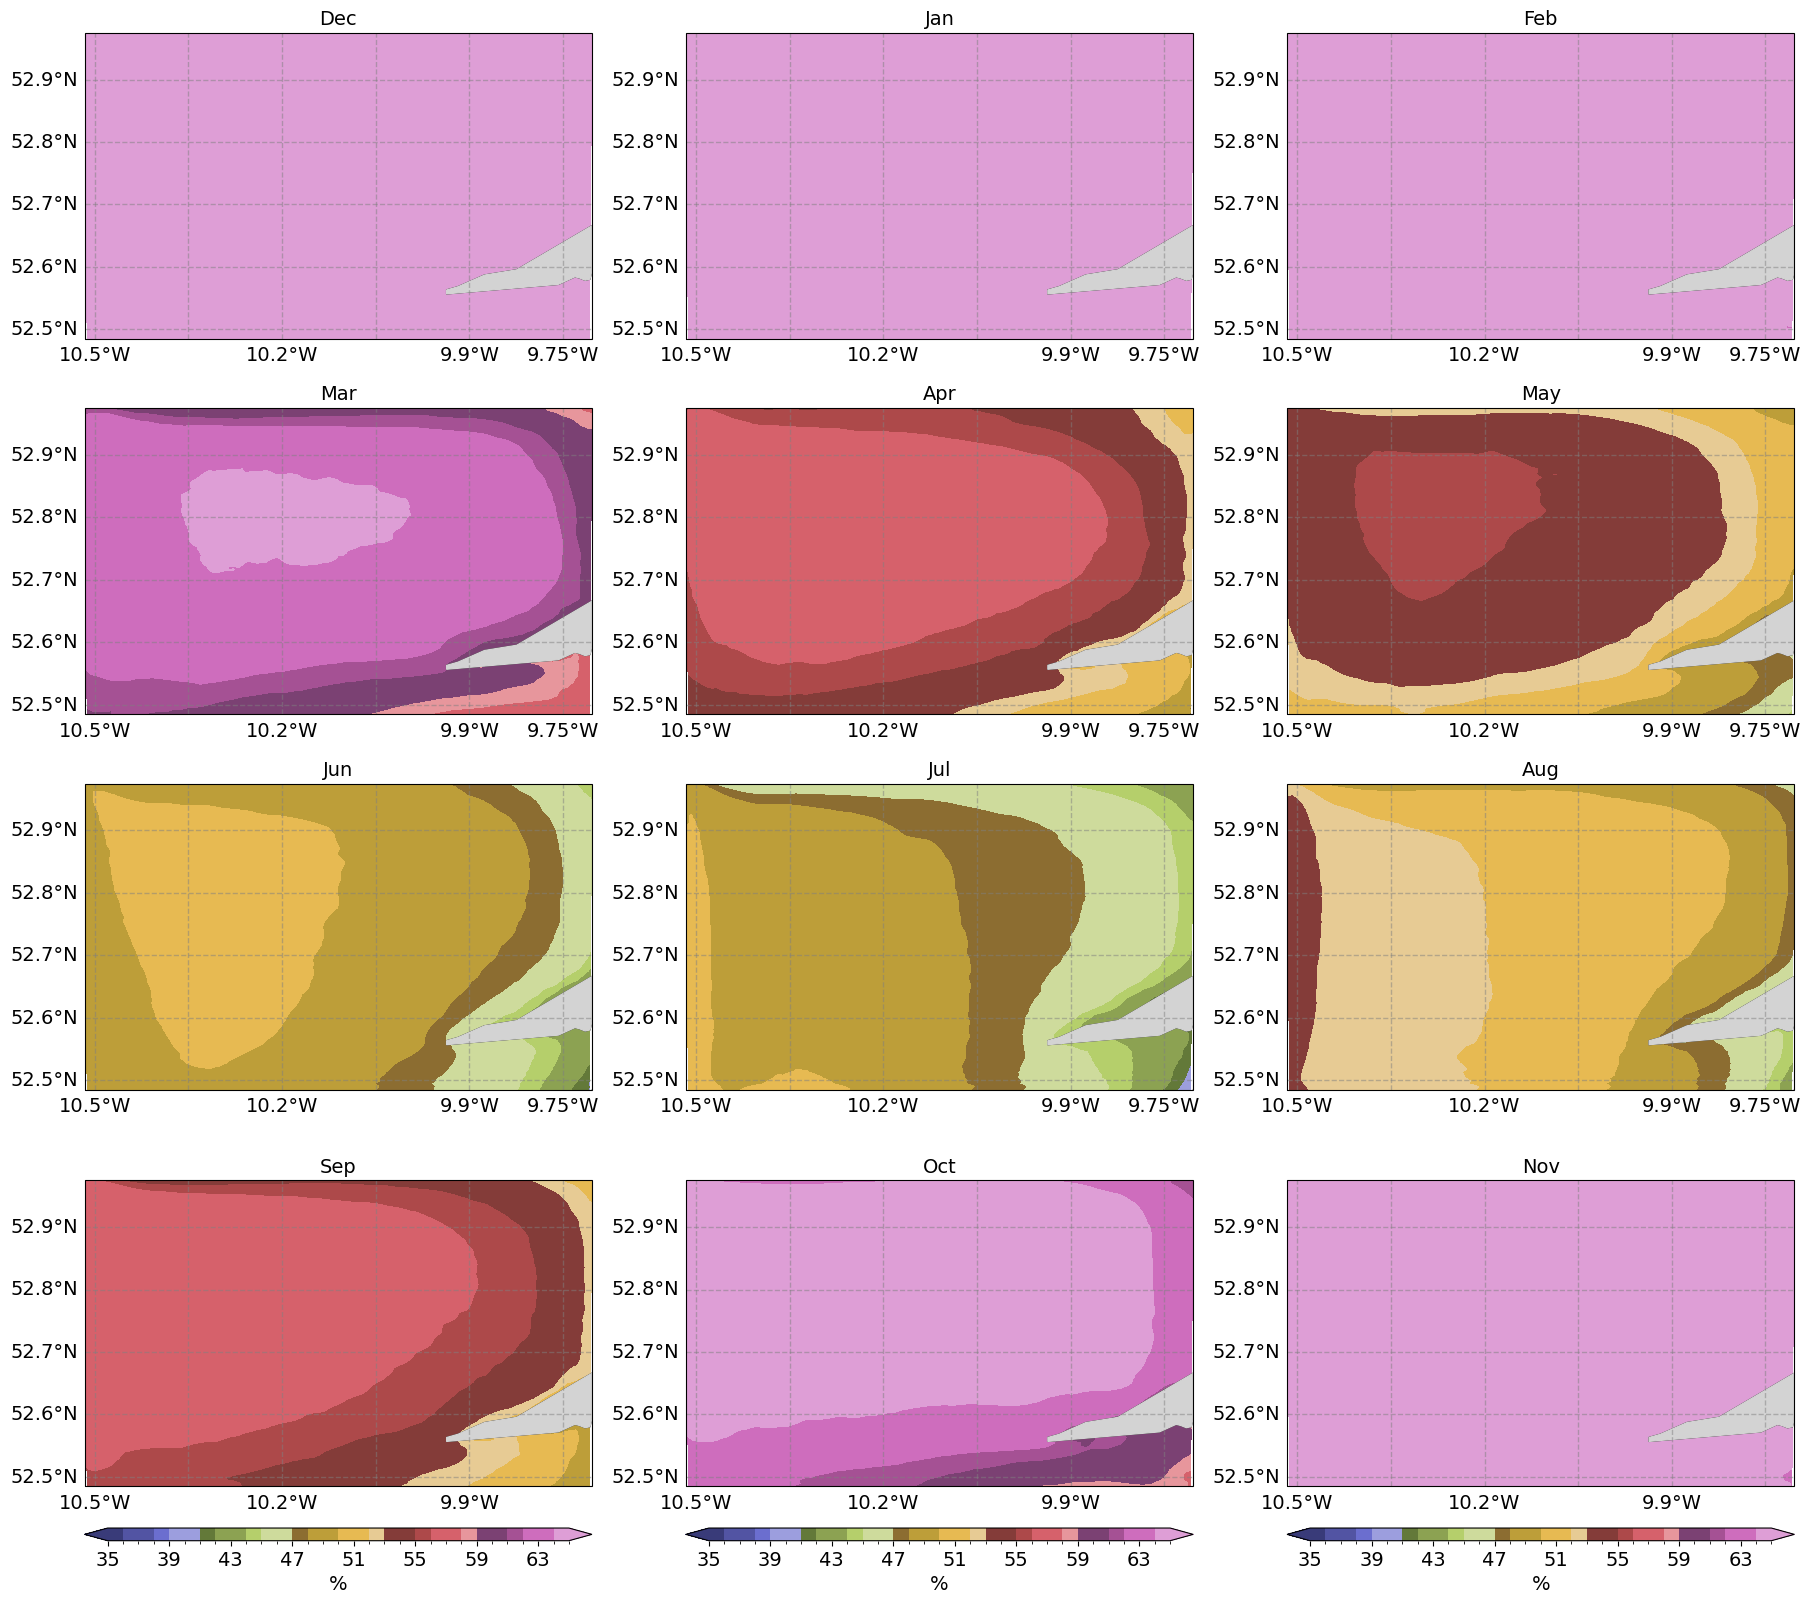

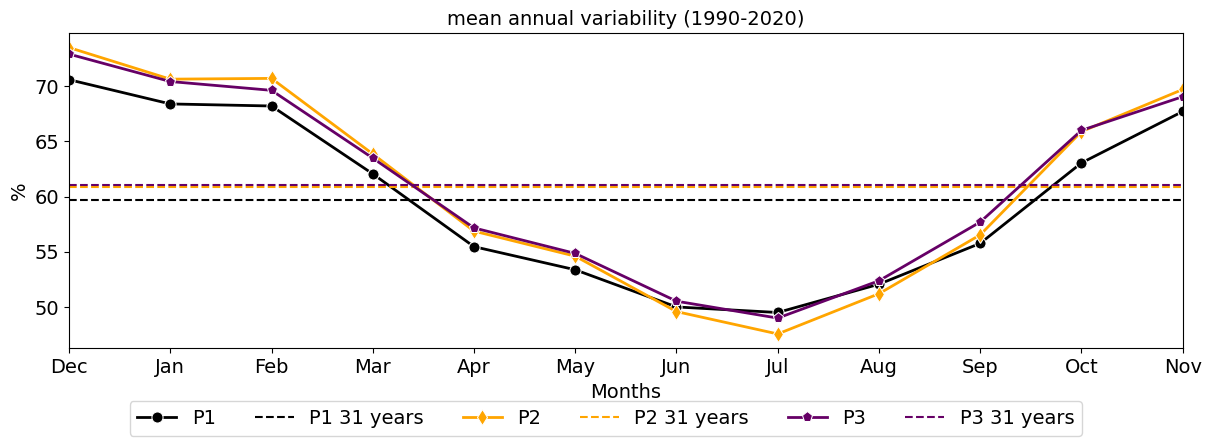

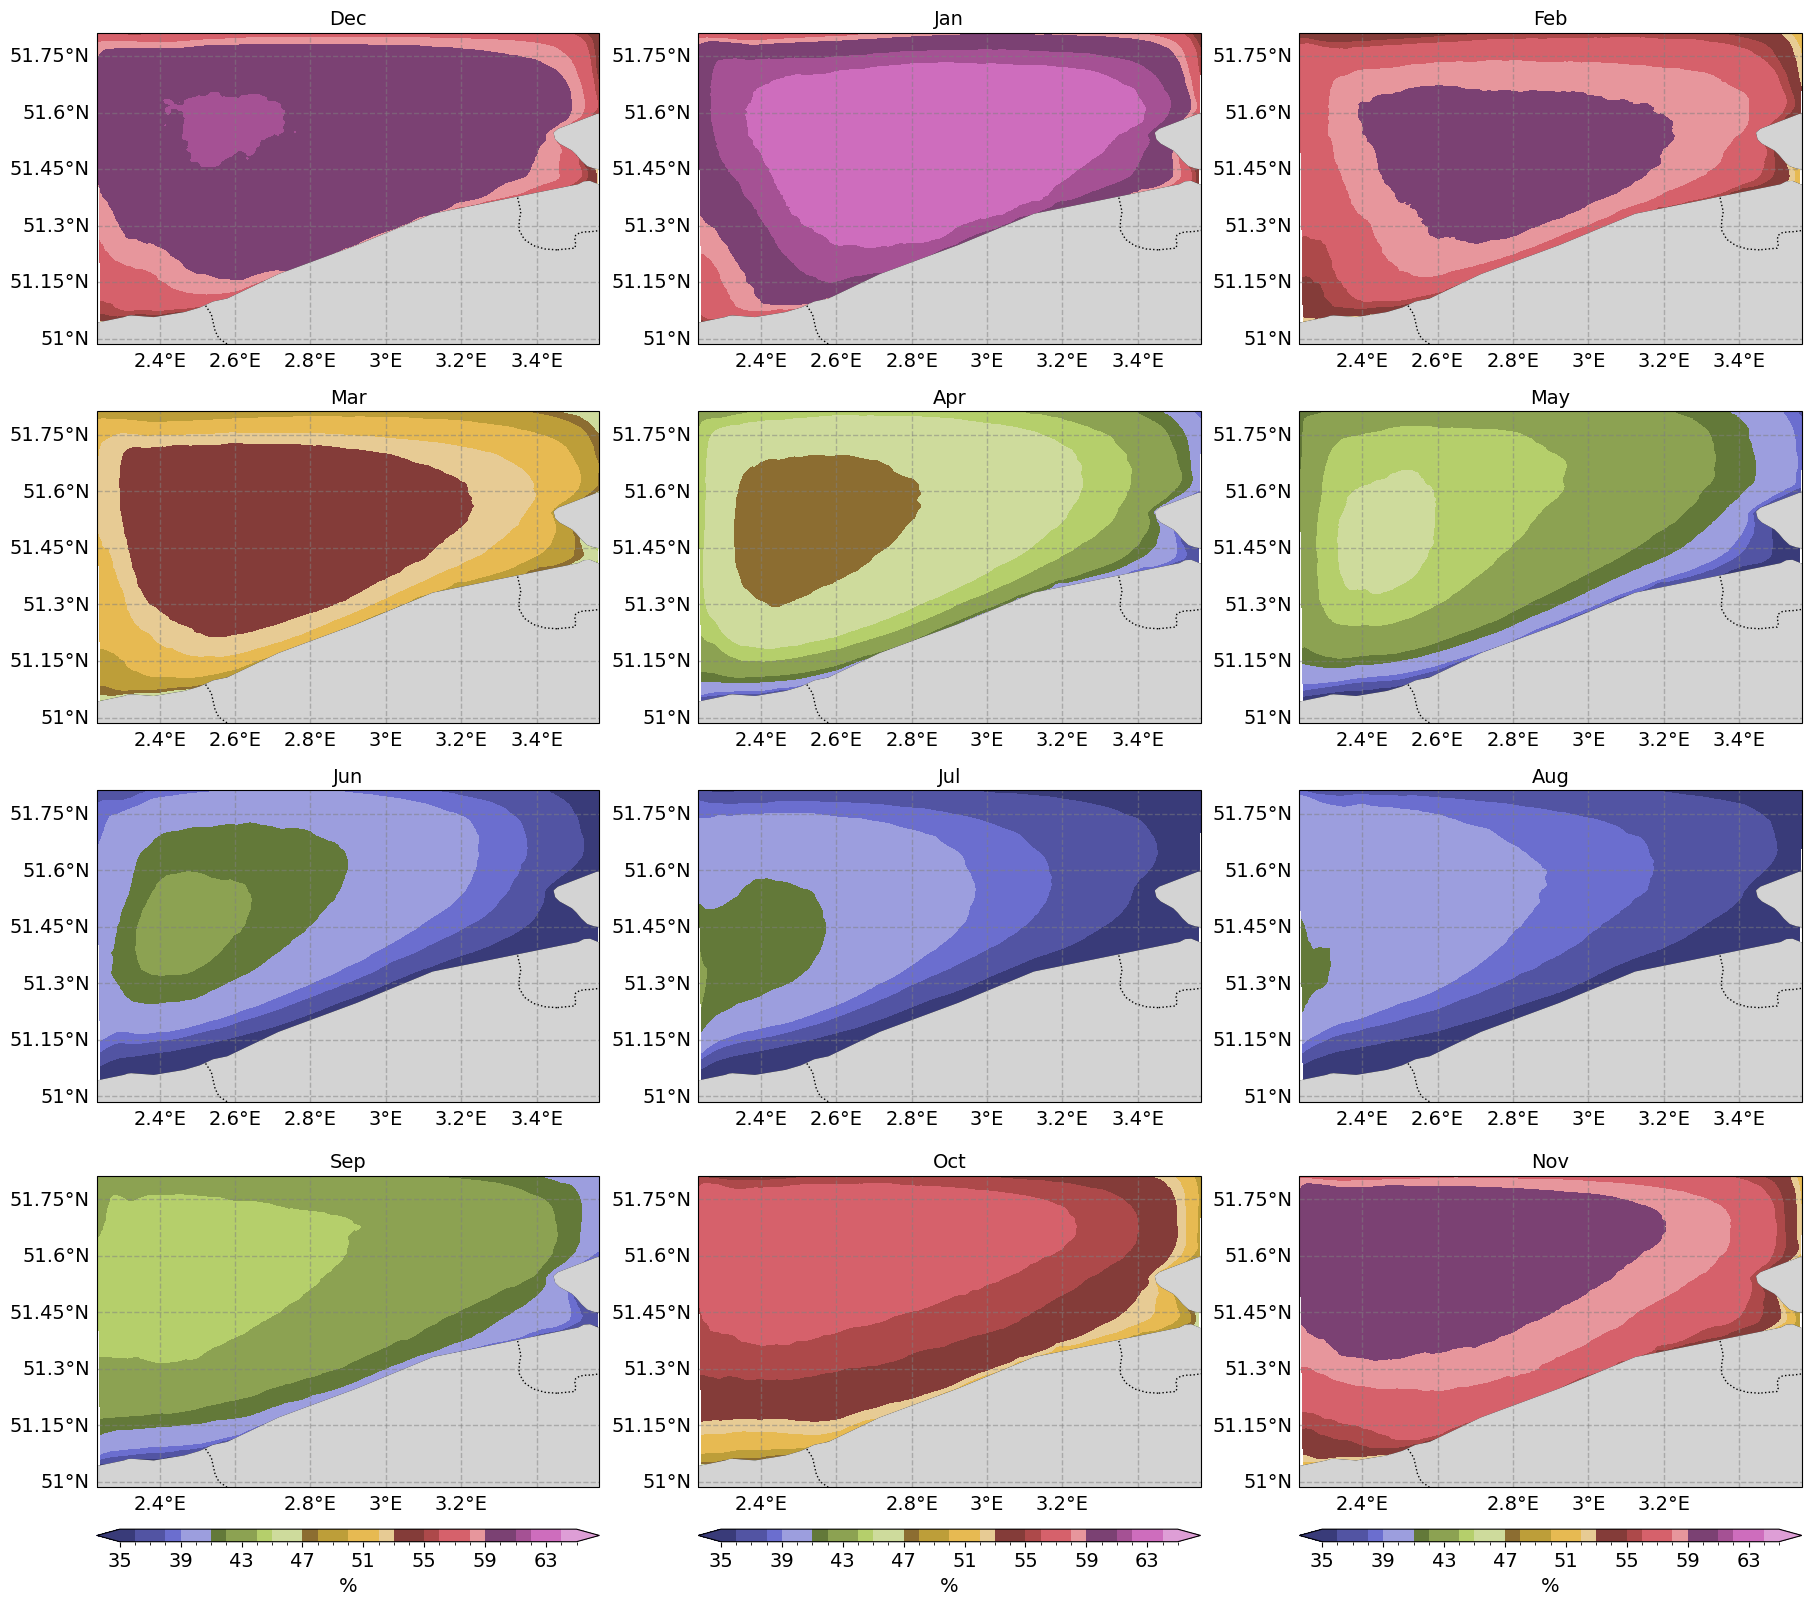

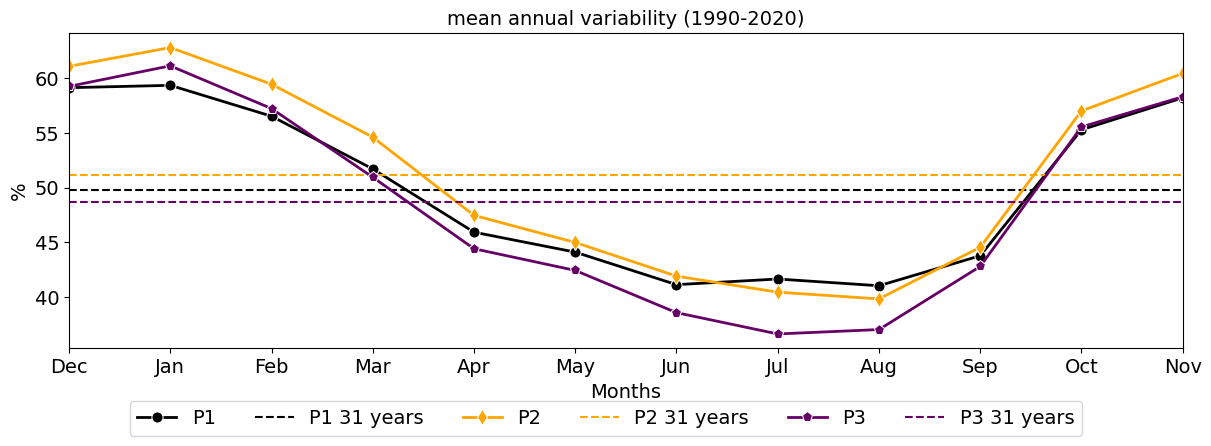

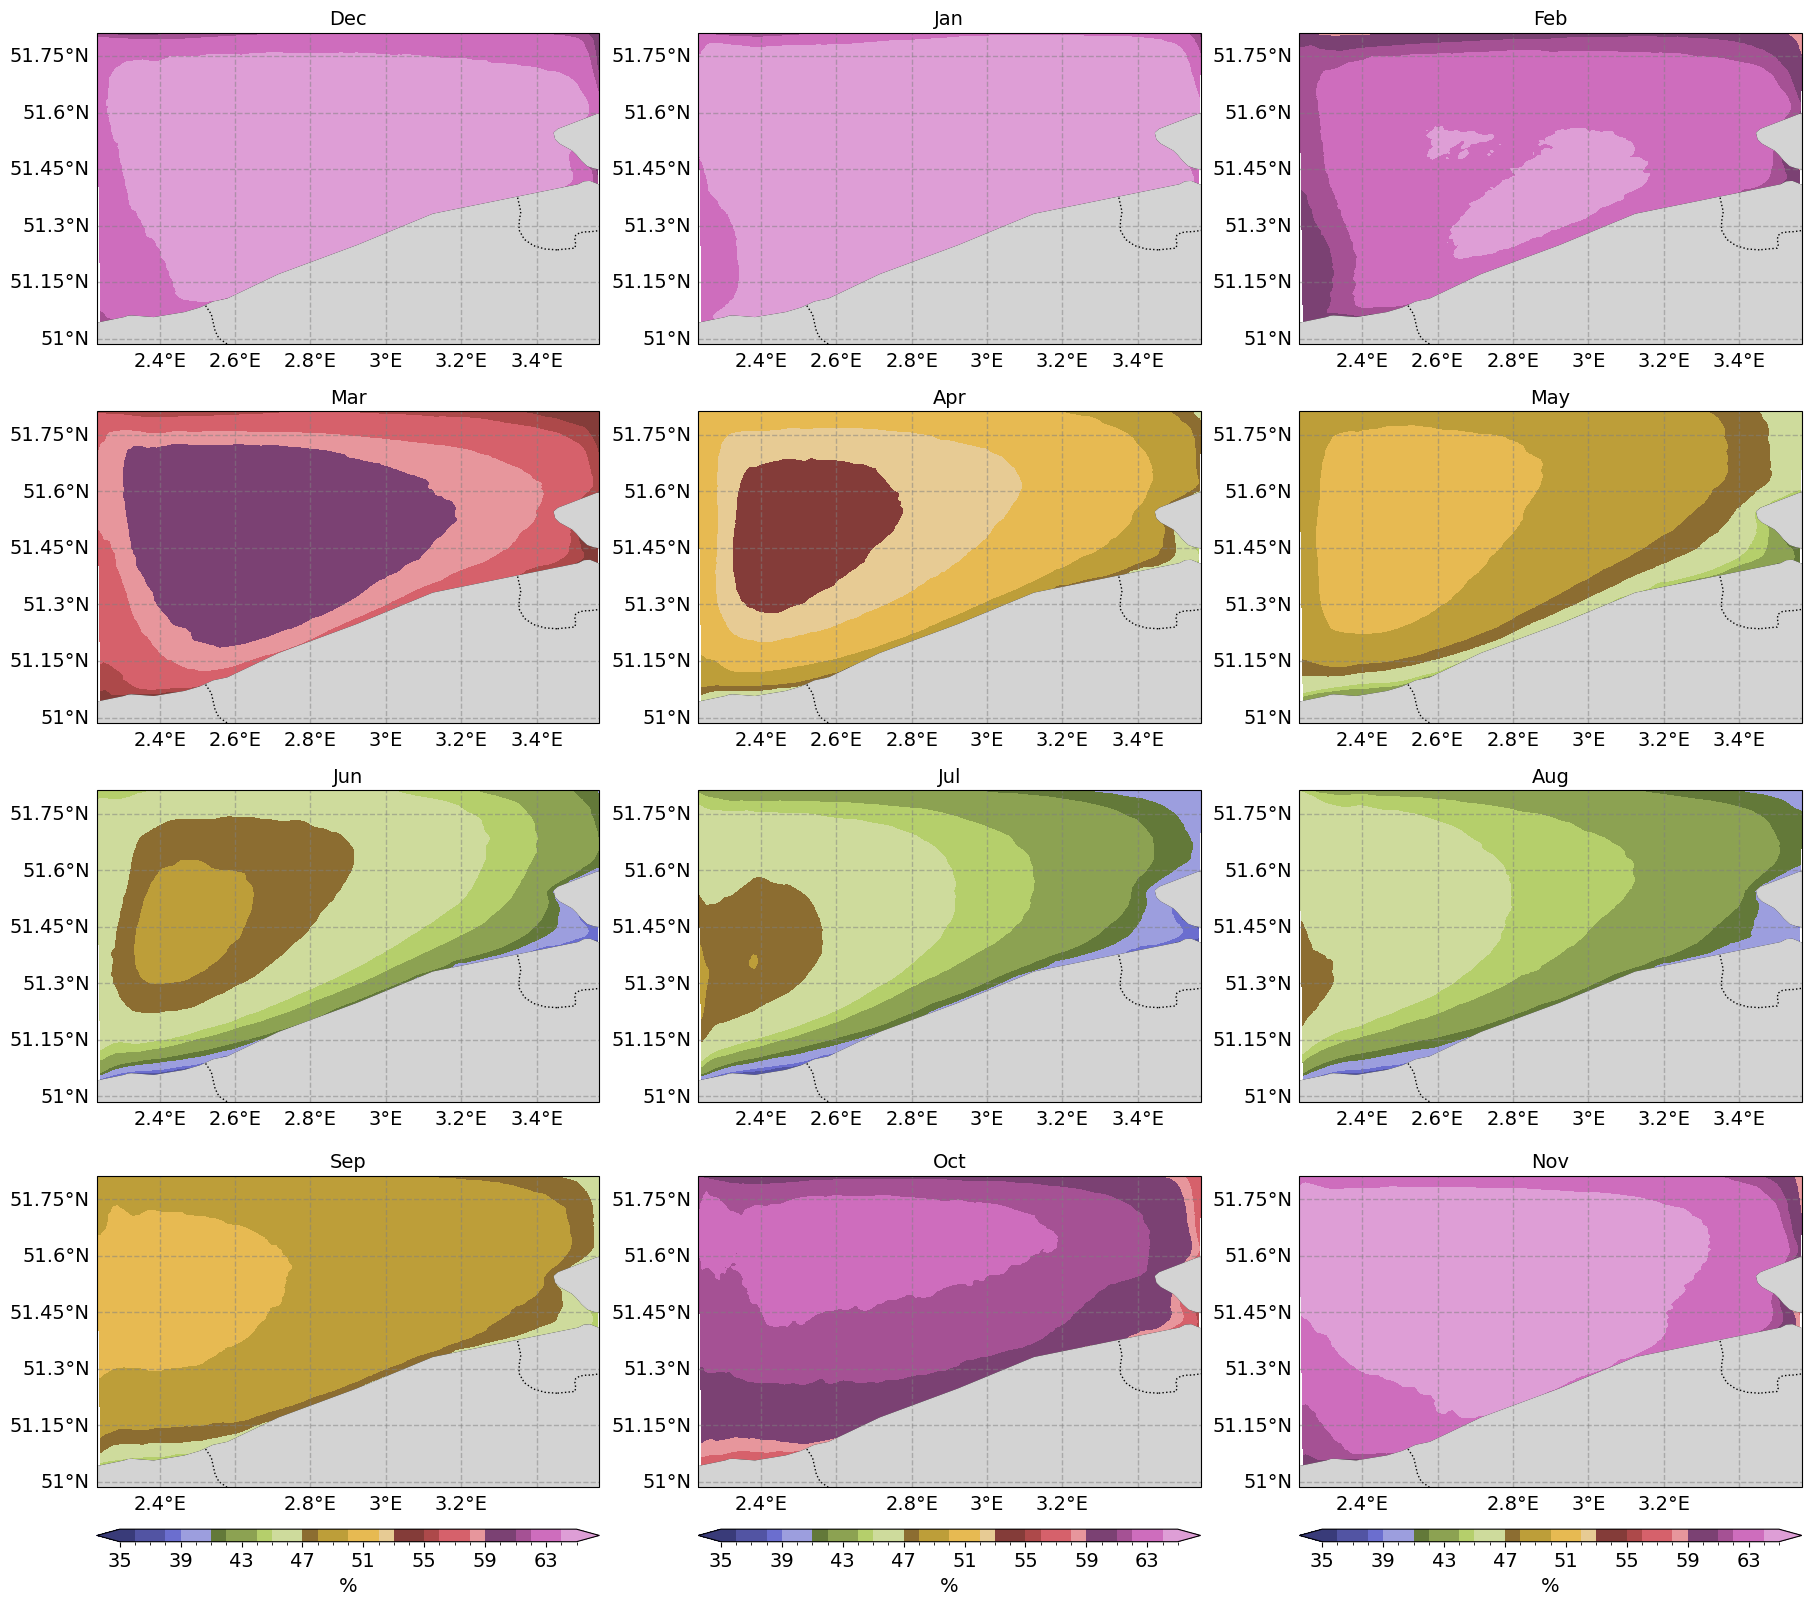

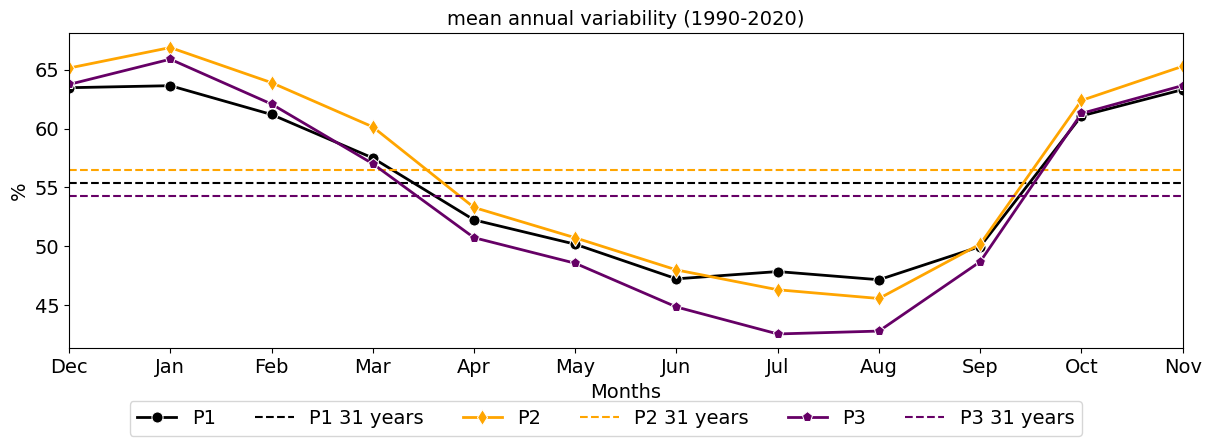

In [14]:
run = 'New_runs'
for case in cases:
    for j,(turbine_type,level) in enumerate([(8,120),(15,150)]):
        var = f'{turbine_type}MW_{level}m'
        target_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/statistics_files/{turbine_type}MW/tp_{level}'
        parameter = 'mean'
        ds = xr.open_dataset(f'{target_dir}/{parameter}.nc')
        # computing capacity factor and converting to percentage
        ds = ds*0.1/turbine_type
        
        clevel = clevels[case]
        cmap = cmaps
        cbar_args_= {'shrink':1,'cbar_label':'%','orientation':'horizontal'}
        rows, cols = 4,3
        fig = plt.figure(figsize=(6*cols, rows*fig_heights[case]), constrained_layout=True)
        gs = fig.add_gridspec(rows,cols)
        for i,month in enumerate(months_indices):
            cbar_args=cbar_args_ if i//cols == 3 else None
            axs = map_plotter(fig,gs[i//cols,i%cols],ds.monthly_values.sel(month=month)[10:-10,10:-10],'XLONG','XLAT',
                    clevel,cmap,f'{months[month-1]}',cbar_args,
                    sample_points = None)
        plt.savefig(f'{fig_dir}/{case}_monthly_{parameter}_{var}.png',dpi=300,bbox_inches='tight',pad_inches=0)

        fig = plt.figure(figsize=(12, 4), constrained_layout=True)
        gs = fig.add_gridspec(1,1)

        overall_df = pd.DataFrame()
        monthly_df = pd.DataFrame()
        for i,key in enumerate(all_sample_points[case].keys()):
            indices = find_nearest_indice(ds.XLAT,ds.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])

            data = ds.overall_values.sel(south_north=indices[0],west_east=indices[1]).values
            pointwise_df = pd.DataFrame({key: data}, index=pd.Index([0],name='Overall'))
            overall_df = pd.concat([overall_df, pointwise_df],axis=1)

            data = ds.monthly_values.sel(south_north=indices[0],west_east=indices[1]).values
            pointwise_df = pd.DataFrame({key: data}, index=pd.Index(months, name='month'))
            monthly_df = pd.concat([monthly_df, pointwise_df],axis=1)
        monthly_df = monthly_df.reindex(months_in_seasonal_order)

        xlabel = 'Months'
        xlabel_ticks = months_in_seasonal_order
        ylabel = '%'
        axs = variability_plotter(fig,gs[0,0],monthly_df,overall_df,f'{parameter} annual variability (1990-2020)',
                            'Months',ylabel,None,None,None,xlabel_ticks=xlabel_ticks)
        # Extract legend from one of the subplots
        handles, labels = axs.get_legend_handles_labels()
        # Create a common legend below the figures
        fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.1),fontsize=14)

        plt.savefig(f'{fig_dir}/{case}_{var}_{parameter}_annual_variability.png',dpi=300,bbox_inches='tight',pad_inches=0)

# Solar power

## Power production
- The spv variable stores the solar power potential, in W/m^2. 
- Ideally, one solar panel will have 1 m^2 area, implying that the power production can be in W

In [17]:
start='2020-02-01 00:00:00'
end='2020-02-08 00:00:00'

Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (x) are : (78, 18)
Closest indices in the order of latitude (y) and longitude (x) are : (142, 59)
Closest indices in the order of latitude (y) and longitude (x) are : (175, 146)


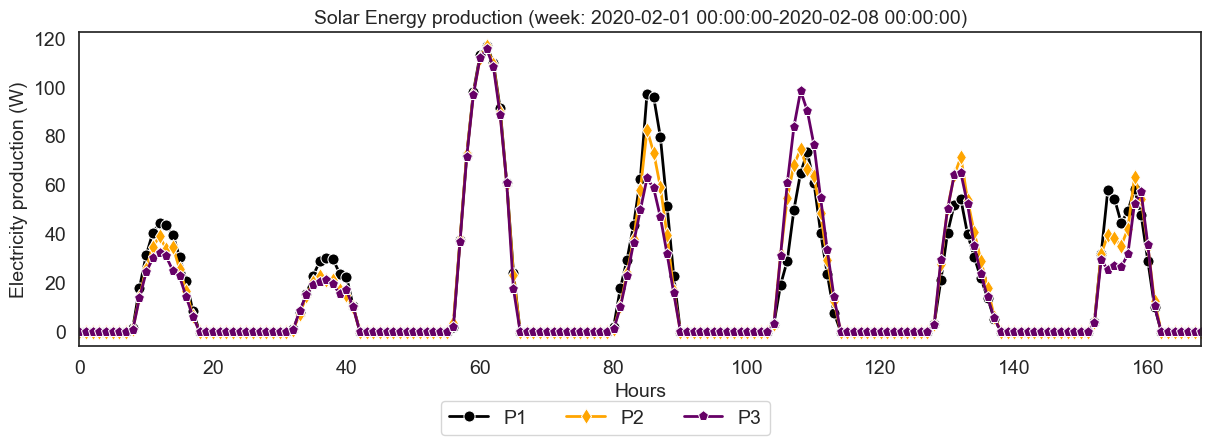

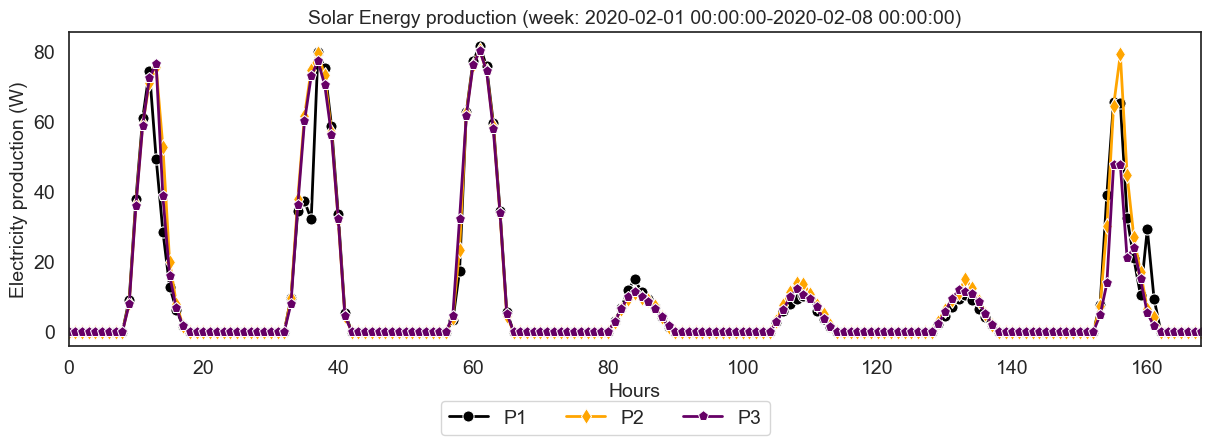

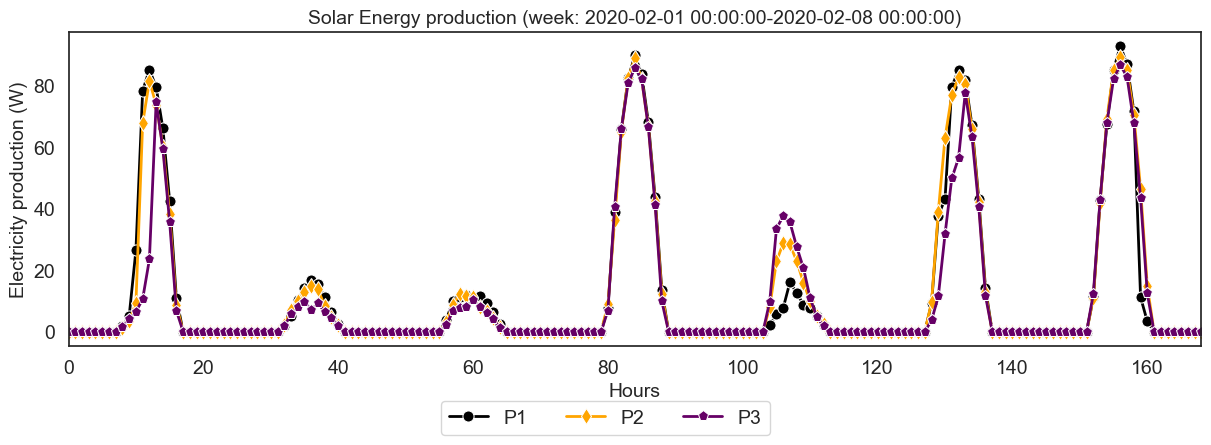

In [22]:
run='New_runs'
for case in cases:
    run_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/variablewise_files'
    chunks={"Time": -1,"south_north": 8,"west_east": 8}
    sample_points = all_sample_points[case]
    
    fig = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fig.add_gridspec(1,1)
    sns.set_theme(style="white")

    spv = xr.open_dataset(f'{run_dir}/spv.nc',chunks=chunks)['PVO'].sel(Time=slice(start,end))

    hourly_df = pd.DataFrame()
    for i,key in enumerate(sample_points.keys()):
        indices = find_nearest_indice(spv.XLAT,spv.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])
        ds = spv.isel(south_north=indices[0],west_east=indices[1])
        pointwise_df = pd.DataFrame({key: ds},index=pd.Index(np.arange(len(ds)), name='Hour'))
        hourly_df = pd.concat([hourly_df, pointwise_df],axis=1)

    axs = power_profile_plotter(fig,gs[0,0],hourly_df,
                          f'Solar Energy production (week: {start}-{end})','Hours','Electricity production (W)', 
                          key,colors[i],'o')

    # Extract legend from one of the subplots
    handles, labels = axs.get_legend_handles_labels()
    # Create a common legend below the figures
    fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.1),fontsize=14)

    plt.savefig(f'{fig_dir}/{case}_solar_energy_production.png',dpi=300,bbox_inches='tight',pad_inches=0)

### Solar energy resource assessment
- The solar power is in W
- To convert that into capacty factor in percentage, just divide by cell watt (in W) and multiply by 100

In [3]:
cell_watt = 365

#### Mean resource assessment

In [29]:
cases = ['Portugal_coast','Ireland_coast','Netherlands_coast']
clevels = {'Portugal_coast':np.arange(6,10.1,0.1),
                 'Ireland_coast':np.arange(6,10.1,0.1),
                 'Netherlands_coast':np.arange(6,10.1,0.1)}
cmaps = 'tab20b'

Closest indices in the order of latitude (y) and longitude (x) are : (26, 79)
Closest indices in the order of latitude (y) and longitude (x) are : (64, 54)
Closest indices in the order of latitude (y) and longitude (x) are : (102, 31)
Closest indices in the order of latitude (y) and longitude (x) are : (24, 45)
Closest indices in the order of latitude (y) and longitude (x) are : (89, 77)
Closest indices in the order of latitude (y) and longitude (x) are : (100, 25)
Closest indices in the order of latitude (y) and longitude (x) are : (78, 18)
Closest indices in the order of latitude (y) and longitude (x) are : (142, 59)
Closest indices in the order of latitude (y) and longitude (x) are : (175, 146)


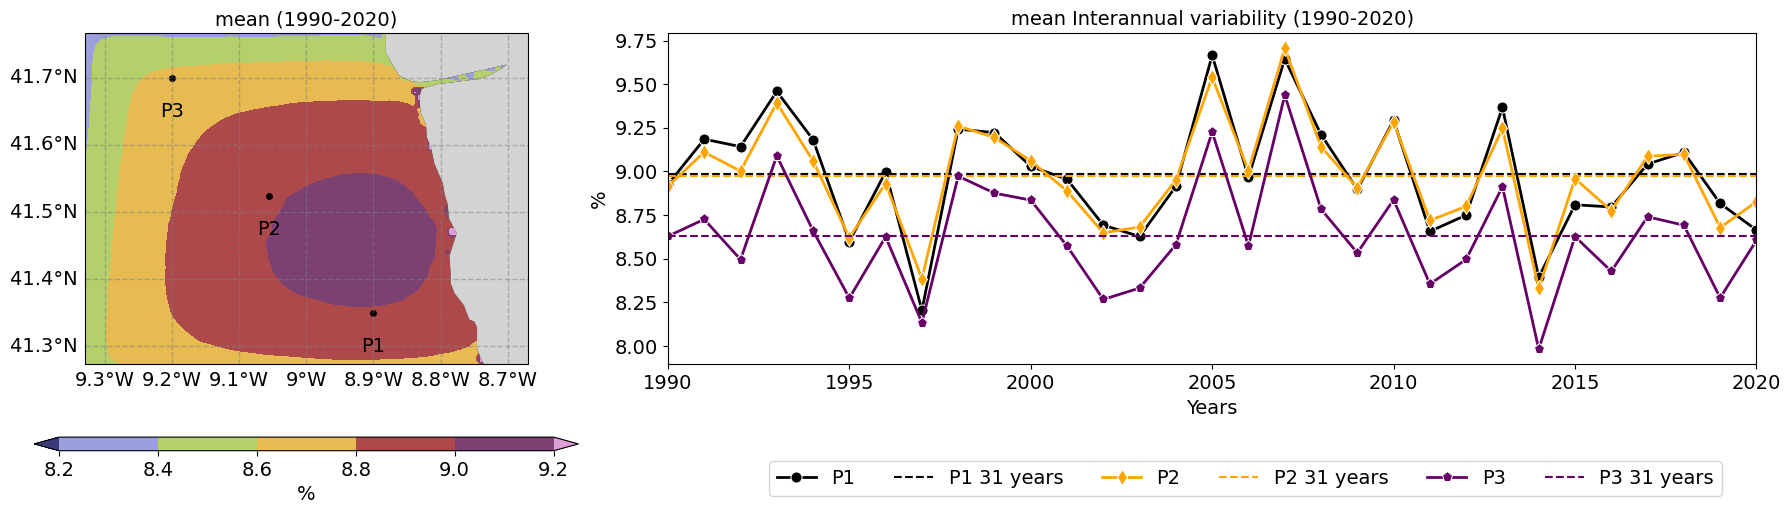

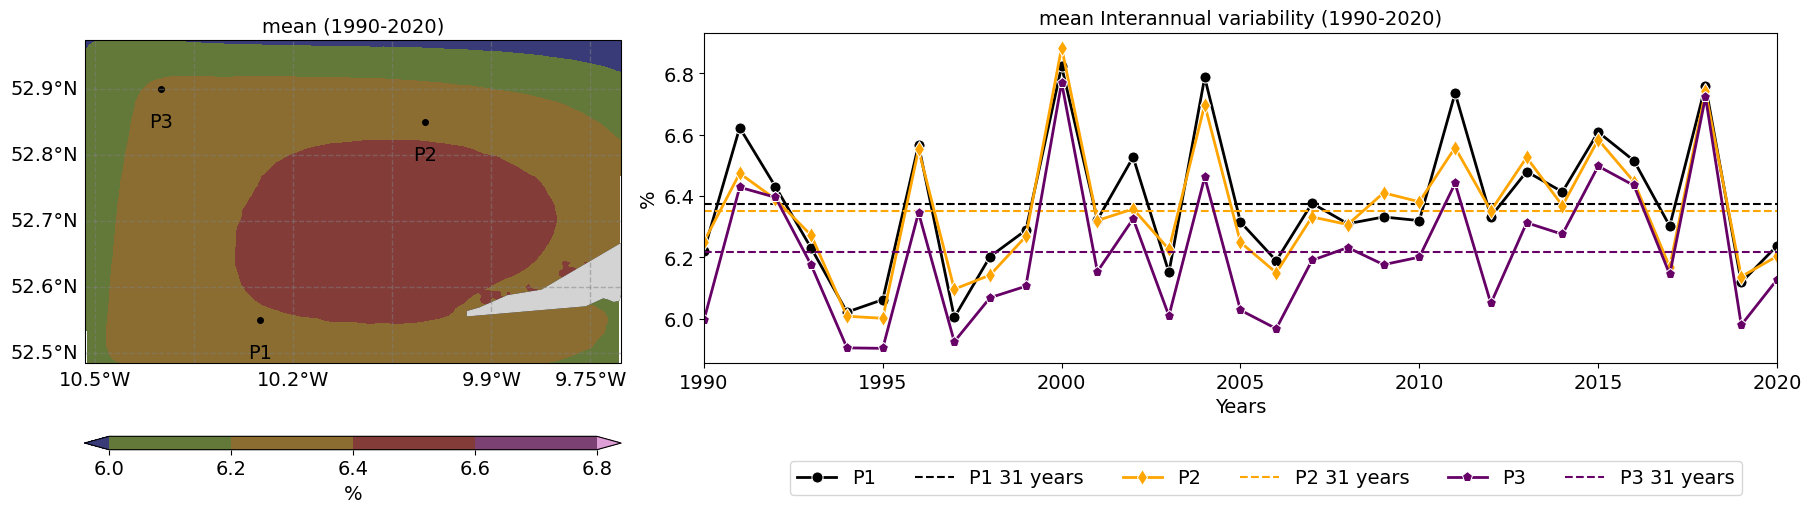

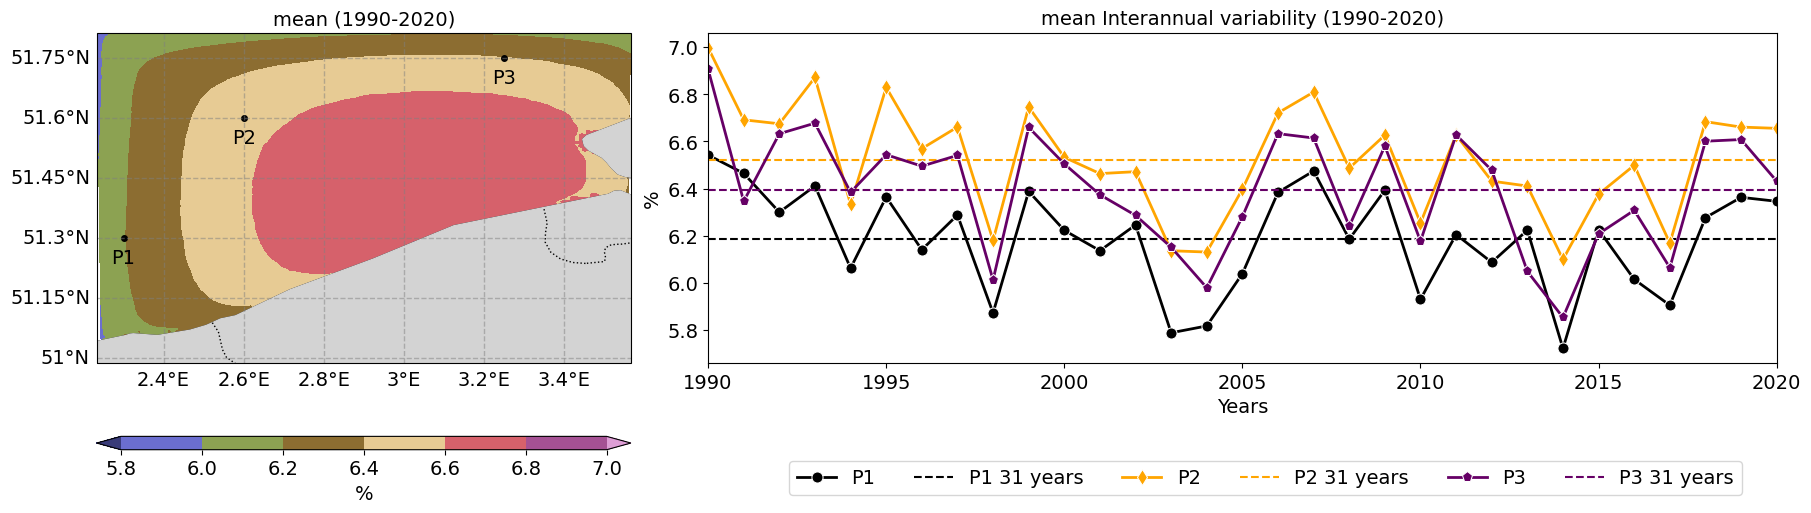

In [4]:
run='New_runs'
var = 'spv'
for case in cases:
    target_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/statistics_files/{var}'
    parameter = 'mean'
    ds = xr.open_dataset(f'{target_dir}/{parameter}.nc')
    # computing capacity factor and converting to percentage
    ds = ds*100/cell_watt

    fig = plt.figure(figsize=(18, 5), constrained_layout=True)
    gs = fig.add_gridspec(1,3)

    clevel = calculate_color_levels(ds.overall_values[20:-20,10:-40])
    cbar_args= {'shrink':1,'cbar_label':'%','orientation':'horizontal'}
    map_plotter(fig,gs[0,0],ds.overall_values[10:-10,10:-10],'XLONG','XLAT',
                clevel,cmap,f'{parameter} (1990-2020)',cbar_args,
                sample_points = all_sample_points[case])

    overall_df = pd.DataFrame()
    yearly_df = pd.DataFrame()
    for i,key in enumerate(all_sample_points[case].keys()):
        indices = find_nearest_indice(ds.XLAT,ds.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])

        data = ds.overall_values.sel(south_north=indices[0],west_east=indices[1]).values
        pointwise_df = pd.DataFrame({key: data}, index=pd.Index([0],name='Overall'))
        overall_df = pd.concat([overall_df, pointwise_df],axis=1)

        data = ds.yearly_values.sel(south_north=indices[0],west_east=indices[1]).values
        pointwise_df = pd.DataFrame({key: data}, index=pd.Index(ds.year, name='year'))
        yearly_df = pd.concat([yearly_df, pointwise_df],axis=1)
    xlabel = 'Years'
    ylabel = '%'
    axs = variability_plotter(fig,gs[0,1:3],yearly_df,None,f'{parameter} Interannual variability (1990-2020)',
                        'Years',ylabel,None,None,None)

    # Extract legend from one of the subplots
    handles, labels = axs.get_legend_handles_labels()
    # Create a common legend below the figures
    fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.7, -0.00),fontsize=14)

    plt.savefig(f'{fig_dir}/{case}_overall_{parameter}_and_interannual_{parameter}_{var}.png',dpi=300,bbox_inches='tight',pad_inches=0)

<GeoAxesSubplot: title={'center': 'mean (1990-2020)'}, xlabel='XLONG [degree_east]', ylabel='XLAT [degree_north]'>

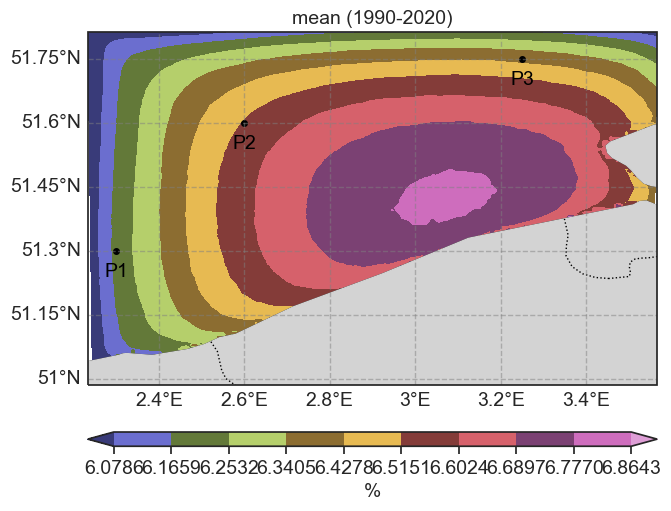

In [43]:
fig = plt.figure(figsize=(18, 5), constrained_layout=True)
gs = fig.add_gridspec(1,3)
clevel = calculate_color_levels(ds.overall_values[20:-20,10:-40])
map_plotter(fig,gs[0,0],ds.overall_values[10:-10,10:-10],'XLONG','XLAT',
                clevel,'tab20b',f'{parameter} (1990-2020)',cbar_args,
                sample_points = all_sample_points[case])

#### Monthly statistics

In [31]:
months_indices = [12,1,2,3,4,5,6,7,8,9,10,11]
months_in_seasonal_order = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
cases = ['Portugal_coast','Ireland_coast','Netherlands_coast']
clevels = {'Portugal_coast':np.arange(2,16.1,1),
                 'Ireland_coast':np.arange(2,16.1,1),
                 'Netherlands_coast':np.arange(2,16.1,1)}
cmaps = 'tab20b'

In [ ]:
run = 'New_runs'
var = 'spv'
for case in cases:
    target_dir=f'{root_dir}/WRFV4.4/EU_SCORES/{run}/{case}/Postprocessed/statistics_files/{var}'
    parameter = 'mean'
    ds = xr.open_dataset(f'{target_dir}/{parameter}.nc')
    # computing capacity factor and converting to percentage
    ds = ds*100/cell_watt
        
    clevel = clevels[case]
    cmap = cmaps
    cbar_args_= {'shrink':1,'cbar_label':'%','orientation':'horizontal'}
    rows, cols = 4,3
    fig = plt.figure(figsize=(6*cols, rows*fig_heights[case]), constrained_layout=True)
    gs = fig.add_gridspec(rows,cols)
    for i,month in enumerate(months_indices):
        cbar_args=cbar_args_ if i//cols == 3 else None
        axs = map_plotter(fig,gs[i//cols,i%cols],ds.monthly_values.sel(month=month)[10:-10,10:-10],'XLONG','XLAT',
                clevel,cmap,f'{months[month-1]}',cbar_args,
                sample_points = None)
    plt.savefig(f'{fig_dir}/{case}_monthly_{parameter}_{var}.png',dpi=300,bbox_inches='tight',pad_inches=0)

    fig = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fig.add_gridspec(1,1)

    overall_df = pd.DataFrame()
    monthly_df = pd.DataFrame()
    for i,key in enumerate(all_sample_points[case].keys()):
        indices = find_nearest_indice(ds.XLAT,ds.XLONG,all_sample_points[case][key][0],all_sample_points[case][key][1])

        data = ds.overall_values.sel(south_north=indices[0],west_east=indices[1]).values
        pointwise_df = pd.DataFrame({key: data}, index=pd.Index([0],name='Overall'))
        overall_df = pd.concat([overall_df, pointwise_df],axis=1)

        data = ds.monthly_values.sel(south_north=indices[0],west_east=indices[1]).values
        pointwise_df = pd.DataFrame({key: data}, index=pd.Index(months, name='month'))
        monthly_df = pd.concat([monthly_df, pointwise_df],axis=1)
    monthly_df = monthly_df.reindex(months_in_seasonal_order)

    xlabel = 'Months'
    xlabel_ticks = months_in_seasonal_order
    ylabel = '%'
    axs = variability_plotter(fig,gs[0,0],monthly_df,overall_df,f'{parameter} annual variability (1990-2020)',
                        'Months',ylabel,None,None,None,xlabel_ticks=xlabel_ticks)
    # Extract legend from one of the subplots
    handles, labels = axs.get_legend_handles_labels()
    # Create a common legend below the figures
    fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.1),fontsize=14)

    plt.savefig(f'{fig_dir}/{case}_{var}_{parameter}_annual_variability.png',dpi=300,bbox_inches='tight',pad_inches=0)